# Chile Tourism Data Analysis (PCA)

Representatives of Chilean government (the Ministry of Economic Development and Tourism of Chile) hired a consulting company, trying to improve the tourism industry in the country. Government officials provided some existing data (messy as always!) and expect meaninful insights and recommendations.

Project objective:

Based on the data associated to the 15 regions of Chile under the 5 dimensions considered, you are expected to deliver a report that will include the three sections outlined below:

Perform a Principal Component Analysis (PCA) for the dataset provided, as presented in the video and complementary example available in this module, such that you can come up with: a. A ranking for each one of the five dimensions considered, such that regions are ranked within each (five rankings in total).

b. While the main results for each of the five dimensions should be presented first, your methodology and all values obtained (eigenvalues; eigenvectors; weights; results) should be presented in a clear and structured manner as well.

Based on such analysis, you should select 5 to 7 regions to identify and present their main strengths and opportunity areas in a clear and structured manner. Your report should describe the current status of each one of these regions, based on such strengths and opportunity areas. Assume that the client (the Ministry of Economic Development and Tourism of Chile) will consider your report to select a consulting firm to conduct this analysis further.

Based on the information that you will present in 1) and 2) above, plus the information presented in the WEF and OECD references available in this module, select two dimensions that the Chilean government should consider for further investment to improve tourism competitiveness nationwide. Provide a brief rationale that took you to recommend such dimensions.

This first stage of our Case for Analysis is designed to expose you to a real instance, which will demand more than an accurate quantitative analysis to succeed. Think of the document that you will deliver as your preliminary analysis and proposal to deliver to the client, so they evaluate the current and potential work of your consulting team to work further on this.

A key question that you should consider while working on this assignment is: what makes your analysis and recommendations unique, and better, as compared to other ones presented by other consulting teams? Make sure that your document ‘speaks by itself’ to answer this question in a clear and structured manner.

In [264]:
# Import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import pca
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn 
import matplotlib.pyplot as plt

# Set additional parameters for charts and tables

# Remove column display limits
pd.set_option('display.max_columns', None)
# pd.set_option('display.height', None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.width', None)
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_style("white")

##### 1. Data Importing and Data Cleaning

Data cleaning is a serios part of this assignment. This analysis demonstrates that in real life your datasets will not come to you clean and handy, and you will spend a significant amount of time (usually about 80%) on preparing a dataset.

For the purpose of this analysis the given .xlsx file was converted as .csv without losing the information from the first sheet.

In [227]:
# Read data in csv format, using encoding, and read the third row as column names
chile_data1 = pd.read_excel('Tourism Chile D1 - D5_updated1019.xlsx', encoding = 'ISO-8859-1', header = 3)

# Read data in csv format, using encoding, and read the third row as column names
chile_data2 = pd.read_excel('Tourism Chile D6 - D10 (3_updated1019).xls', encoding = 'ISO-8859-1', header = 7)

##### Cleaning Chile_Data first five components

In [228]:
chile_data1.head()

,Unnamed: 0,N°,VARIABLE,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,GALERIES,% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP,NUMBER OF EXHIBITS,"ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR",MAJOR SPORTS EVENTS PER YEAR,"OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS",ARTWORK SITES,POPULAR ARCHITECTURE SITES,HISTORICAL SITES,LOCAL MARKETS,CULTURAL SITES LEVEL III (INTERNATIONAL),CULTURA SITES LEVEL II (NATIONAL),CULTURAL SITES LEVEL I (LOCAL),HERITAGE ARCHITECTURAL HOUSES,% OF LAND THAT CORRESPONDS TO FORESTS,NATIONAL PROTECTED SITES (%),% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,TOXIC WASTE DISPOSAL (TONS/100 hab.),NUMBER OF ENVIRONMENTAL COMPLAINTS PRESENTED,ENVIRONMENTAL ISSUES PER MILLION HABITANTS,NUMBER OF BEACHES AND BEACH RESORTS,LAND AFFECTED BY WILDFIRES,NATURAL PROTECTED SITES LEVEL III (INTERNATIONAL),NATURAL PROTECTED SITES LEVEL II (NATIONAL),"RIVERS, LAKES AND WATERFALLS","MOUNTAINS, VOLCANOES AND MOUNTAIN SYSTEMS",GEISERS AND THERMAL CENTERS,PIERS AND SEASHORES,GLACIERS AND WINTER VACATION LOCATIONS,VALLEYS,DESERTS AND DUNES,ISLANDS AND PENINSULAS,PALEONTOLOGY SITES,HIKING TRAILS,PRESERVED SITES,SEASHORE PROTECTED SITES,BIOSHPERE RESERVES,% AVAILABLE WORKFORCE,% POPULATION ORIENTED TOWARDS TOURISM,AVERAGE MONTHLY INCOME (CHILEAN PESOS),5 POPULATION WITH PRIMARY EDUCATION,% POPULATION WITH SECONDARY EDUCATION,AVERAGE NUMBER OF YEARS STUDYING,HIGHER EDUCATION AND TECHNICAL INSTITUTIONS,TOURISM-ORIENTED INSTITUTIONS,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,% OF TOURISM-RELATED ROOMS AVAILABLE THROUGHOUT THE YEAR,ROOMS PER 1000 HABITANTS,"NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.","TOURISM-RELATED WORKFORCE (PER 10,000 EMPLOYEES)",AVERAGE % OF OCCUPANCY THROUGHOUT THE YEAR,AVERAGE NUMBER OF NIGHTS THAT TOURISTS SPEND,NUMBER OF ESTABLISHMENTS WITH A TOURIST-RELATED CERTIFICATION,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RELATED CERTIFICATIONS,TOURISM-RELATED INVESTEMENTS (MILLION USD) BY CHAMBER OF COMMERCE MEMBERS,TOURISM-RELATED INFRASTRUCTURE INVESTMENT (MILLION USD/YEAR),NATIONAL TOURISTS ARRIVALS,INTERNATIONAL TOURISTS ARRIVALS,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,DENSITY OF AIRPORTS,DENSITY OF ROADS AND HIGHWAYS,% OF ROADS THAT ARE HIGHWAYS (FOUR LINES),NUMBER OF VEHICLES,VISITORS TO PROTECTED SITES,NUMBER OF CRUISES THAT ARRIVE PER YEAR,TOURIST'S ARRIVALS THROUGH BORDER LINES,SECONDARY ROADS (KMS),NUMBER OF INTERNATIONAL BORDER GATES
0,NaN,XV,Arica y Parinacota,31.0,2,0,30,28,4,22.1,2,105,12,2,25.4,1,0,0,0,4,32,4,3,9,32,7,59,-,21.9,0.458002,58.001835,1,0.000000,5,-,13,13,4,6,6,2,0,8,2,0,0,2,-,0,1,42.556098,0.876906,293648.079108,94.1,83.8,11.138020,52.730379,2,193,11,20.037544,356,23.693333,18.740377,6544,33.009217,37.0,2.3,5,3,0.0,0,97454,34186,1151575,5.273038,2.129253,17.35,45248,15045,13,167211,4.67,3
1,NaN,I,Tarapacá,0.0,5,1,13,73,5,20.8,2,178,12,1,12.6,1,0,0,0,0,34,10,1,6,34,12,0,0.17288,9.1,0.027992,76.025528,1,0.000000,16,-,2,6,1,1,7,5,0,5,6,4,2,3,5,0,0,68.563325,1.454279,381466.167681,91.7,66.7,10.705366,41.849759,5,255,19,22.180372,380,23.034783,22.172003,11108,41.431262,42.8,2.1,5,10,0.0,11,235365,40919,19560,4.184976,4.021302,15.90,81182,17161,0,434727,184.10,1
2,NaN,II,Antofagasta,1.0,9,0,28,81,16,27.4,8,203,15,2,5.7,2,1,0,3,1,24,37,0,4,31,26,63,-,2.8,0.028164,39.558771,2,0.000000,22,-,5,28,8,13,3,14,1,6,10,6,4,0,5,0,0,54.486398,1.079387,475865.938335,91.7,66.7,10.641231,40.487141,7,529,47,20.446006,184,24.550218,22.761871,19920,35.021377,44.6,1.8,2,10,17.0,15,413922,84195,22898,2.024357,3.331950,52.25,112607,315888,0,115100,23.00,5
3,NaN,III,Atacama,8.0,10,0,8,35,7,20.

In [229]:
# Remove first 2 columns
chile_data1.drop(chile_data1.iloc[:, 0:2], inplace = True, axis = 1)
chile_data1.head()

,VARIABLE,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,GALERIES,% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP,NUMBER OF EXHIBITS,"ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR",MAJOR SPORTS EVENTS PER YEAR,"OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS",ARTWORK SITES,POPULAR ARCHITECTURE SITES,HISTORICAL SITES,LOCAL MARKETS,CULTURAL SITES LEVEL III (INTERNATIONAL),CULTURA SITES LEVEL II (NATIONAL),CULTURAL SITES LEVEL I (LOCAL),HERITAGE ARCHITECTURAL HOUSES,% OF LAND THAT CORRESPONDS TO FORESTS,NATIONAL PROTECTED SITES (%),% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,TOXIC WASTE DISPOSAL (TONS/100 hab.),NUMBER OF ENVIRONMENTAL COMPLAINTS PRESENTED,ENVIRONMENTAL ISSUES PER MILLION HABITANTS,NUMBER OF BEACHES AND BEACH RESORTS,LAND AFFECTED BY WILDFIRES,NATURAL PROTECTED SITES LEVEL III (INTERNATIONAL),NATURAL PROTECTED SITES LEVEL II (NATIONAL),"RIVERS, LAKES AND WATERFALLS","MOUNTAINS, VOLCANOES AND MOUNTAIN SYSTEMS",GEISERS AND THERMAL CENTERS,PIERS AND SEASHORES,GLACIERS AND WINTER VACATION LOCATIONS,VALLEYS,DESERTS AND DUNES,ISLANDS AND PENINSULAS,PALEONTOLOGY SITES,HIKING TRAILS,PRESERVED SITES,SEASHORE PROTECTED SITES,BIOSHPERE RESERVES,% AVAILABLE WORKFORCE,% POPULATION ORIENTED TOWARDS TOURISM,AVERAGE MONTHLY INCOME (CHILEAN PESOS),5 POPULATION WITH PRIMARY EDUCATION,% POPULATION WITH SECONDARY EDUCATION,AVERAGE NUMBER OF YEARS STUDYING,HIGHER EDUCATION AND TECHNICAL INSTITUTIONS,TOURISM-ORIENTED INSTITUTIONS,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,% OF TOURISM-RELATED ROOMS AVAILABLE THROUGHOUT THE YEAR,ROOMS PER 1000 HABITANTS,"NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.","TOURISM-RELATED WORKFORCE (PER 10,000 EMPLOYEES)",AVERAGE % OF OCCUPANCY THROUGHOUT THE YEAR,AVERAGE NUMBER OF NIGHTS THAT TOURISTS SPEND,NUMBER OF ESTABLISHMENTS WITH A TOURIST-RELATED CERTIFICATION,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RELATED CERTIFICATIONS,TOURISM-RELATED INVESTEMENTS (MILLION USD) BY CHAMBER OF COMMERCE MEMBERS,TOURISM-RELATED INFRASTRUCTURE INVESTMENT (MILLION USD/YEAR),NATIONAL TOURISTS ARRIVALS,INTERNATIONAL TOURISTS ARRIVALS,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,DENSITY OF AIRPORTS,DENSITY OF ROADS AND HIGHWAYS,% OF ROADS THAT ARE HIGHWAYS (FOUR LINES),NUMBER OF VEHICLES,VISITORS TO PROTECTED SITES,NUMBER OF CRUISES THAT ARRIVE PER YEAR,TOURIST'S ARRIVALS THROUGH BORDER LINES,SECONDARY ROADS (KMS),NUMBER OF INTERNATIONAL BORDER GATES
0,Arica y Parinacota,31.0,2,0,30,28,4,22.1,2,105,12,2,25.4,1,0,0,0,4,32,4,3,9,32,7,59,-,21.9,0.458002,58.001835,1,0.000000,5,-,13,13,4,6,6,2,0,8,2,0,0,2,-,0,1,42.556098,0.876906,293648.079108,94.1,83.8,11.138020,52.730379,2,193,11,20.037544,356,23.693333,18.740377,6544,33.009217,37.0,2.3,5,3,0.0,0,97454,34186,1151575,5.273038,2.129253,17.35,45248,15045,13,167211,4.67,3
1,Tarapacá,0.0,5,1,13,73,5,20.8,2,178,12,1,12.6,1,0,0,0,0,34,10,1,6,34,12,0,0.17288,9.1,0.027992,76.025528,1,0.000000,16,-,2,6,1,1,7,5,0,5,6,4,2,3,5,0,0,68.563325,1.454279,381466.167681,91.7,66.7,10.705366,41.849759,5,255,19,22.180372,380,23.034783,22.172003,11108,41.431262,42.8,2.1,5,10,0.0,11,235365,40919,19560,4.184976,4.021302,15.90,81182,17161,0,434727,184.10,1
2,Antofagasta,1.0,9,0,28,81,16,27.4,8,203,15,2,5.7,2,1,0,3,1,24,37,0,4,31,26,63,-,2.8,0.028164,39.558771,2,0.000000,22,-,5,28,8,13,3,14,1,6,10,6,4,0,5,0,0,54.486398,1.079387,475865.938335,91.7,66.7,10.641231,40.487141,7,529,47,20.446006,184,24.550218,22.761871,19920,35.021377,44.6,1.8,2,10,17.0,15,413922,84195,22898,2.024357,3.331950,52.25,112607,315888,0,115100,23.00,5
3,Atacama,8.0,10,0,8,35,7,20.0,0,144,12,0,7.5,0,0,0,0,0,18,5,0,2,29,7,3

In [230]:
# Checking the shape of the data
chile_data1.shape

(16, 82)

In [232]:
chile_data1.tail()

,VARIABLE,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,GALERIES,% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP,NUMBER OF EXHIBITS,"ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR",MAJOR SPORTS EVENTS PER YEAR,"OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS",ARTWORK SITES,POPULAR ARCHITECTURE SITES,HISTORICAL SITES,LOCAL MARKETS,CULTURAL SITES LEVEL III (INTERNATIONAL),CULTURA SITES LEVEL II (NATIONAL),CULTURAL SITES LEVEL I (LOCAL),HERITAGE ARCHITECTURAL HOUSES,% OF LAND THAT CORRESPONDS TO FORESTS,NATIONAL PROTECTED SITES (%),% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,TOXIC WASTE DISPOSAL (TONS/100 hab.),NUMBER OF ENVIRONMENTAL COMPLAINTS PRESENTED,ENVIRONMENTAL ISSUES PER MILLION HABITANTS,NUMBER OF BEACHES AND BEACH RESORTS,LAND AFFECTED BY WILDFIRES,NATURAL PROTECTED SITES LEVEL III (INTERNATIONAL),NATURAL PROTECTED SITES LEVEL II (NATIONAL),"RIVERS, LAKES AND WATERFALLS","MOUNTAINS, VOLCANOES AND MOUNTAIN SYSTEMS",GEISERS AND THERMAL CENTERS,PIERS AND SEASHORES,GLACIERS AND WINTER VACATION LOCATIONS,VALLEYS,DESERTS AND DUNES,ISLANDS AND PENINSULAS,PALEONTOLOGY SITES,HIKING TRAILS,PRESERVED SITES,SEASHORE PROTECTED SITES,BIOSHPERE RESERVES,% AVAILABLE WORKFORCE,% POPULATION ORIENTED TOWARDS TOURISM,AVERAGE MONTHLY INCOME (CHILEAN PESOS),5 POPULATION WITH PRIMARY EDUCATION,% POPULATION WITH SECONDARY EDUCATION,AVERAGE NUMBER OF YEARS STUDYING,HIGHER EDUCATION AND TECHNICAL INSTITUTIONS,TOURISM-ORIENTED INSTITUTIONS,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,% OF TOURISM-RELATED ROOMS AVAILABLE THROUGHOUT THE YEAR,ROOMS PER 1000 HABITANTS,"NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.","TOURISM-RELATED WORKFORCE (PER 10,000 EMPLOYEES)",AVERAGE % OF OCCUPANCY THROUGHOUT THE YEAR,AVERAGE NUMBER OF NIGHTS THAT TOURISTS SPEND,NUMBER OF ESTABLISHMENTS WITH A TOURIST-RELATED CERTIFICATION,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RELATED CERTIFICATIONS,TOURISM-RELATED INVESTEMENTS (MILLION USD) BY CHAMBER OF COMMERCE MEMBERS,TOURISM-RELATED INFRASTRUCTURE INVESTMENT (MILLION USD/YEAR),NATIONAL TOURISTS ARRIVALS,INTERNATIONAL TOURISTS ARRIVALS,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,DENSITY OF AIRPORTS,DENSITY OF ROADS AND HIGHWAYS,% OF ROADS THAT ARE HIGHWAYS (FOUR LINES),NUMBER OF VEHICLES,VISITORS TO PROTECTED SITES,NUMBER OF CRUISES THAT ARRIVE PER YEAR,TOURIST'S ARRIVALS THROUGH BORDER LINES,SECONDARY ROADS (KMS),NUMBER OF INTERNATIONAL BORDER GATES
11,Los Ríos,3.0,9,0,1,33,8,16.2,3,94,12,2,16.7,2,1,0,1,0,10,5,2,0,10,19,55,46.1093,6.9,0.312223,35.412014,0,0.000000,10,0.137278,2,31,13,3,14,4,0,1,0,5,1,0,-,0,1,47.217554,0.407261,2.686481e+05,93.6,64.8,9.260614,30.864544,4,444,58,8.698190,868,17.282051,18.911548,12846,11.812703,37.9,1.7,9,1,54.1,0,113900,16070,11145,0.000000,2.018597,133.02,51811,376,7,0,42.67,1
12,Los Lagos,1.0,24,1,0,64,11,19.8,8,272,31,1,20.8,2,0,0,0,0,38,3,3,0,57,30,94,56.3222,15.9,0.181163,34.766770,1,0.000000,18,0.00293141,12,41,17,10,9,10,3,6,0,31,0,0,7,3,1,54.554723,14.971801,2.914308e+05,92.9,66.7,9.061238,30.694576,10,856,72,20.928120,2672,14.083607,23.972464,35548,23.816201,31.6,1.8,27,13,54.1,48,275043,105048,259411,10.929917,1.892795,135.48,129882,486725,28,192977,660.16,3
13,Aysén,0.0,4,0,2,17,0,14.8,0,49,12,0,21.8,0,0,0,0,0,24,2,0,1,20,10,0,44.3851,39.4,0.020771,43.886897,0,0.000000,0,0.00557867,21,93,25,8,6,5,23,3,0,8,3,6,6,0,2,61.015773,1.049554,4.180440e+05,95.3,68.5,9.451188,65.579504,3,64,6,67.765488,83,6.825397,37.598916,8020,23.062126,21.7,1.7,0,1,0.0,19,28584,10763,90876,0.000000,4.088663,3.70,19348,32030,0,56201,5.25,4
14,Magallanes y Antártica,0.0,3,0,2,45,6,27.7,2,4,14,0,2

In [233]:
# Remove the last row with Total data
chile_data1 = chile_data1[:-1]
print(chile_data1.shape)
chile_data1.tail()

(15, 82)


,VARIABLE,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,GALERIES,% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP,NUMBER OF EXHIBITS,"ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR",MAJOR SPORTS EVENTS PER YEAR,"OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS",ARTWORK SITES,POPULAR ARCHITECTURE SITES,HISTORICAL SITES,LOCAL MARKETS,CULTURAL SITES LEVEL III (INTERNATIONAL),CULTURA SITES LEVEL II (NATIONAL),CULTURAL SITES LEVEL I (LOCAL),HERITAGE ARCHITECTURAL HOUSES,% OF LAND THAT CORRESPONDS TO FORESTS,NATIONAL PROTECTED SITES (%),% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,TOXIC WASTE DISPOSAL (TONS/100 hab.),NUMBER OF ENVIRONMENTAL COMPLAINTS PRESENTED,ENVIRONMENTAL ISSUES PER MILLION HABITANTS,NUMBER OF BEACHES AND BEACH RESORTS,LAND AFFECTED BY WILDFIRES,NATURAL PROTECTED SITES LEVEL III (INTERNATIONAL),NATURAL PROTECTED SITES LEVEL II (NATIONAL),"RIVERS, LAKES AND WATERFALLS","MOUNTAINS, VOLCANOES AND MOUNTAIN SYSTEMS",GEISERS AND THERMAL CENTERS,PIERS AND SEASHORES,GLACIERS AND WINTER VACATION LOCATIONS,VALLEYS,DESERTS AND DUNES,ISLANDS AND PENINSULAS,PALEONTOLOGY SITES,HIKING TRAILS,PRESERVED SITES,SEASHORE PROTECTED SITES,BIOSHPERE RESERVES,% AVAILABLE WORKFORCE,% POPULATION ORIENTED TOWARDS TOURISM,AVERAGE MONTHLY INCOME (CHILEAN PESOS),5 POPULATION WITH PRIMARY EDUCATION,% POPULATION WITH SECONDARY EDUCATION,AVERAGE NUMBER OF YEARS STUDYING,HIGHER EDUCATION AND TECHNICAL INSTITUTIONS,TOURISM-ORIENTED INSTITUTIONS,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,% OF TOURISM-RELATED ROOMS AVAILABLE THROUGHOUT THE YEAR,ROOMS PER 1000 HABITANTS,"NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.","TOURISM-RELATED WORKFORCE (PER 10,000 EMPLOYEES)",AVERAGE % OF OCCUPANCY THROUGHOUT THE YEAR,AVERAGE NUMBER OF NIGHTS THAT TOURISTS SPEND,NUMBER OF ESTABLISHMENTS WITH A TOURIST-RELATED CERTIFICATION,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RELATED CERTIFICATIONS,TOURISM-RELATED INVESTEMENTS (MILLION USD) BY CHAMBER OF COMMERCE MEMBERS,TOURISM-RELATED INFRASTRUCTURE INVESTMENT (MILLION USD/YEAR),NATIONAL TOURISTS ARRIVALS,INTERNATIONAL TOURISTS ARRIVALS,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,DENSITY OF AIRPORTS,DENSITY OF ROADS AND HIGHWAYS,% OF ROADS THAT ARE HIGHWAYS (FOUR LINES),NUMBER OF VEHICLES,VISITORS TO PROTECTED SITES,NUMBER OF CRUISES THAT ARRIVE PER YEAR,TOURIST'S ARRIVALS THROUGH BORDER LINES,SECONDARY ROADS (KMS),NUMBER OF INTERNATIONAL BORDER GATES
10,Araucanía,18.0,13,0,2,96,5,13.2,8,179,58,4,30.1,0,5,3,0,13,16,6,10,0,12,31,20,29.4361,9.6,0.430527,36.785178,6,0.0,25,0.157817,22,79,51,10,17,3,7,10,0,1,3,23,5,0,1,52.281718,2.303617,251080.776288,94.5,72.0,9.146811,28.750999,8,709,67,9.085316,709,11.208333,9.899544,26140,16.089059,37.4,2.5,15,7,24.0,25,200377,38524,130713,0.000000,1.615220,236.97,124956,228921,0,112246,469.74,3
11,Los Ríos,3.0,9,0,1,33,8,16.2,3,94,12,2,16.7,2,1,0,1,0,10,5,2,0,10,19,55,46.1093,6.9,0.312223,35.412014,0,0.0,10,0.137278,2,31,13,3,14,4,0,1,0,5,1,0,-,0,1,47.217554,0.407261,268648.112777,93.6,64.8,9.260614,30.864544,4,444,58,8.698190,868,17.282051,18.911548,12846,11.812703,37.9,1.7,9,1,54.1,0,113900,16070,11145,0.000000,2.018597,133.02,51811,376,7,0,42.67,1
12,Los Lagos,1.0,24,1,0,64,11,19.8,8,272,31,1,20.8,2,0,0,0,0,38,3,3,0,57,30,94,56.3222,15.9,0.181163,34.766770,1,0.0,18,0.00293141,12,41,17,10,9,10,3,6,0,31,0,0,7,3,1,54.554723,14.971801,291430.764263,92.9,66.7,9.061238,30.694576,10,856,72,20.928120,2672,14.083607,23.972464,35548,23.816201,31.6,1.8,27,13,54.1,48,275043,105048,259411,10.929917,1.892795,135.48,129882,486725,28,192977,660.16,3
13,Aysén,0.0,4,0,2,17,0,14.8,0,49,12,0,21.8

###### Cleaning Chile_Data1 next five components

In [234]:
chile_data2.head()

,Regions,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants",Ski resorts,Major shopping centers,"Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Number of vineyards,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual participating on a strike,Banks per one million habitants,Temporary residents,Exports (volume in million chilean pesos),Density of tourism offices per one million habitants,Number of tourism information offices,Average number of internet searches for main tourist attractions,Yearly budget for tourism promotion ($M),Yearly budget for international tourism promotion ($M),Governmental resources allocated to tourism promotion ($M),Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Seed funds allocated to the tourism sector ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development
0,Arica y Parinacota,35.8567,19.563,12,21.6195,43.7662,0,5.27304,1,20,20.0375,5,0,0,0,240.55,17,6,0,0.318,0.26,42.1843,15.8191,0.513,11884613,0.426,26467,2387,981,319,265,7.3,8.2,84.3686,1,11,253,94.9147,45560,137,5.27304,6517,1060490,193364,118413,92641,36370835,11757543,446922,24729573,1
1,Tarapacá,25.9469,26.6164,2,18.9579,60.2637,0,4.18498,3,9,22.1804,5,40.1339,0,2,213.07,28,0,0,0.421,0.468,87.8845,0,0.516,14740693,0.398,76896,1862,1105,593,592,4.8,13.4,485.457,6,14.9,59745,138.104,83265,3236,4.18498,7600,1750481,74404,13600,0,42364100,12796789,355208,29714382,2
2,Antofagasta,37.2482,35.4465,22,29.9605,69.233,3,4.04871,3,36,20.446,2,14.292,0,3,259.23,39,2,0,0.546,0.314,109.315,0,0.381,22383612,0.495,123017,4228,2324,7,765,6.2,7.3,12.1461,13,9.6,30220,178.143,238010,16666,4.04871,16280,2846340,200000,149000,149744,38262875,29066423,192572,50841622,1
3,Atacama,44.8226,26.9329,19,25.4781,56.2248,1,3.93181,1,9,18.4795,3,32.4374,0,0,184.01,35,1,0,0.39,0.197,66.8407,0,0.488,17068077,0.533,21705,3125,965,14,504,6.4,10.2,15.7272,3,29.3,17860,145.477,53046,3456,3.93181,11614,556668,94100,187035,0,35948639,16986593,233225,30224699,2
4,Coquimbo,37.632,25.1654,9,17.8047,47.7446,3,3.31559,3,13,6.96275,3,14.0913,0,1,150.06,72,3,0,0.288,0.218,155.833,0,0.396,20225710,0.449,69974,4203,1831,100,1082,6,12.3,11.6046,3,29,1431,112.73,275447,2229,1.6578,11056,5364222,189900,72917,0,64917630,33222779,673800,44790979,3


In [235]:
# Checking the shape of the data
chile_data2.shape

(19, 51)

In [236]:
chile_data2.tail()

,Regions,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants",Ski resorts,Major shopping centers,"Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Number of vineyards,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual participating on a strike,Banks per one million habitants,Temporary residents,Exports (volume in million chilean pesos),Density of tourism offices per one million habitants,Number of tourism information offices,Average number of internet searches for main tourist attractions,Yearly budget for tourism promotion ($M),Yearly budget for international tourism promotion ($M),Governmental resources allocated to tourism promotion ($M),Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Seed funds allocated to the tourism sector ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development
14,Magallanes y Antártica,59.0084,59.3399,12,34.6757,71.6057,0,13.2603,1,15,137.244,0,18.3655,1,2,297.25,21,3,0,0.283,0.18,53.0413,6.63016,0.367,20075842,0.414,8659,2527,660,0,216,5.4,6.1,86.192,1,22,616,5.11451,322800,397,13.2603,4217,558678,266000,525000,32100,30955753,18036736,357752,30288105,1
15,AÑO,2010,2006,2011,2011,2010,2011,2011,2011,2011,2011,2010,2004,2011,2011,2011,2012,2012,NaN,2010,2010,2010,2010,2010,2010,2010,2008,2010,2008,2011,2011,2011,2009,2010,2010,2010,2010,2011,2011,2009,2011,2011,2011,2011-2014,2011-2014,2011,2011,2011,Promedio 2011-2010,2011,Desde 2000 hasta 2030
16,FUENTE,INE - Informe anual de turismo,SERNATUR - Turismo y empleo en Chile,SERNATUR - Unidad de servicios turísticos,INE -“Estadísticas de salud” – “Dotación de ca...,"SBIF -""Información financiera” – Categoría “Pr...",Atractivos Turísticos Base SIG SERNATUR,Superintendencia de Casinos de Juego – Estadís...,Federación chilena de golf – Listado de clubes,SERNATUR - Unidad de servicios turísticos,SERNATUR - Unidad de servicios turísticos,SERNATUR- Micrositio de rutas termales,INE-Primer Catastro Nacional de Instalaciones ...,SERNATUR - Sitio web Chile es Tuyo,Camara Chilena de Centros Comerciales - Catást...,Subsecretaría de Telecomunicaciones - Series L...,Comisión Nacional de Energía - Sistema de Info...,SERNATUR - Servicio de Angencias de Viajes y T...,SIG Sernatur/ Categoría Realizaciones Técticas...,Subsecretaría de prevención del delito – encue...,INE - Encuesta de seguridad ciudadana,INE – Anuario de Investigaciones,INE – Anuario de Investigaciones,Fundación Paz Ciudadana - Conceptos Nº 22: La ...,DIPRES – instituciones – Ministerio del interi...,INE - Encuesta de seguridad ciudadana,Subsecretaría de prevención del delito,INE – Anuario de Investigaciones,INE - Carabineros Informe Anual 2008,Carabineros de Chile - Carabineros en Cifras 2011,Carabineros de Chile - Cuenta Pública,INE – Nueva encuesta nacional de empleo,Ministerio de Desarrollo Social,INE – Anuario de Investigaciones,Dirección del Trabajo – Compendio de series es...,Dirección del

In [237]:
# Remove the last row with Total data
chile_data2 = chile_data2[:-4]
print(chile_data2.shape)
chile_data2.tail()

(15, 51)


,Regions,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants",Ski resorts,Major shopping centers,"Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Number of vineyards,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual participating on a strike,Banks per one million habitants,Temporary residents,Exports (volume in million chilean pesos),Density of tourism offices per one million habitants,Number of tourism information offices,Average number of internet searches for main tourist attractions,Yearly budget for tourism promotion ($M),Yearly budget for international tourism promotion ($M),Governmental resources allocated to tourism promotion ($M),Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Seed funds allocated to the tourism sector ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development
10,Araucanía,15.9856,15.6865,25,25.8874,40.8264,23,2.30008,2,16,9.08532,13,22.7363,4,1,135.88,118,5,0,0.381,0.288,78.2027,1.15004,0.369,29000528,0.469,140063,8685,3161,323,1550,8,18.1,20.7007,4,30.3,5856,232.887,395583,372,1.15004,9488,1842375,108799,27507,0,67212297,31050589,0,54529735,2
11,Los Ríos,34.5122,26.2068,9,30.4717,42.6492,2,2.80587,1,40,8.69819,12,0,1,0,191.32,44,1,0,0.274,0.27,101.011,0,0.298,15834434,0.44,22076,3235,818,29,773,6.4,14.3,11.2235,4,11.3,6171,51.6227,71200,71,2.80587,7109,1476220,253292,35000,13000,49376288,22065484,486875,32409855,1
12,Los Lagos,36.4149,27.36,24,22.6442,47.2976,2,4.18562,2,27,20.9281,8,25.7276,2,2,162.58,86,6,0,0.323,0.201,104.641,0,0.374,19901362,0.426,85949,8729,2023,192,1409,3.5,11.8,23.7185,2,8,2160,994.622,122157,2251,4.18562,4707.67,7108761,264511,96915,63500,101170739,40816121,737875,62581190,2
13,Aysén,76.5094,40.9872,15,27.5434,43.7197,0,10.9299,0,57,67.7655,4,24.2644,1,0,170.81,20,0,0,0.351,0.256,174.879,10.9299,-,15972532,0.445,14119,3349,422,0,469,4.4,5.2,32.7898,1,7,1953,106.083,13667,379,10.9299,5660,200654,65000,454500,536488,32558406,13692259,794614,29462726,2
14,Magallanes y Antártica,59.0084,59.3399,12,34.6757,71.6057,0,13.2603,1,15,137.244,0,18.3655,1,2,297.25,21,3,0,0.283,0.18,53.0413,6.63016,0.367,20075842,0.414,8659,2527,660,0,216,5.4,6.1,86.192,1,22,616,5.11451,322800,397,13.2603,4217,558678,266000,525000,32100,30955753,18036736,357752,30288105,1


##### Merging the two datasets

In [240]:
chile_data = pd.merge(chile_data1, chile_data2, left_on= "VARIABLE", right_on = "Regions")
print(chile_data.shape)
chile_data.head()


(15, 133)


,VARIABLE,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,GALERIES,% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP,NUMBER OF EXHIBITS,"ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR",MAJOR SPORTS EVENTS PER YEAR,"OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS",ARTWORK SITES,POPULAR ARCHITECTURE SITES,HISTORICAL SITES,LOCAL MARKETS,CULTURAL SITES LEVEL III (INTERNATIONAL),CULTURA SITES LEVEL II (NATIONAL),CULTURAL SITES LEVEL I (LOCAL),HERITAGE ARCHITECTURAL HOUSES,% OF LAND THAT CORRESPONDS TO FORESTS,NATIONAL PROTECTED SITES (%),% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,TOXIC WASTE DISPOSAL (TONS/100 hab.),NUMBER OF ENVIRONMENTAL COMPLAINTS PRESENTED,ENVIRONMENTAL ISSUES PER MILLION HABITANTS,NUMBER OF BEACHES AND BEACH RESORTS,LAND AFFECTED BY WILDFIRES,NATURAL PROTECTED SITES LEVEL III (INTERNATIONAL),NATURAL PROTECTED SITES LEVEL II (NATIONAL),"RIVERS, LAKES AND WATERFALLS","MOUNTAINS, VOLCANOES AND MOUNTAIN SYSTEMS",GEISERS AND THERMAL CENTERS,PIERS AND SEASHORES,GLACIERS AND WINTER VACATION LOCATIONS,VALLEYS,DESERTS AND DUNES,ISLANDS AND PENINSULAS,PALEONTOLOGY SITES,HIKING TRAILS,PRESERVED SITES,SEASHORE PROTECTED SITES,BIOSHPERE RESERVES,% AVAILABLE WORKFORCE,% POPULATION ORIENTED TOWARDS TOURISM,AVERAGE MONTHLY INCOME (CHILEAN PESOS),5 POPULATION WITH PRIMARY EDUCATION,% POPULATION WITH SECONDARY EDUCATION,AVERAGE NUMBER OF YEARS STUDYING,HIGHER EDUCATION AND TECHNICAL INSTITUTIONS,TOURISM-ORIENTED INSTITUTIONS,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,% OF TOURISM-RELATED ROOMS AVAILABLE THROUGHOUT THE YEAR,ROOMS PER 1000 HABITANTS,"NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.","TOURISM-RELATED WORKFORCE (PER 10,000 EMPLOYEES)",AVERAGE % OF OCCUPANCY THROUGHOUT THE YEAR,AVERAGE NUMBER OF NIGHTS THAT TOURISTS SPEND,NUMBER OF ESTABLISHMENTS WITH A TOURIST-RELATED CERTIFICATION,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RELATED CERTIFICATIONS,TOURISM-RELATED INVESTEMENTS (MILLION USD) BY CHAMBER OF COMMERCE MEMBERS,TOURISM-RELATED INFRASTRUCTURE INVESTMENT (MILLION USD/YEAR),NATIONAL TOURISTS ARRIVALS,INTERNATIONAL TOURISTS ARRIVALS,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,DENSITY OF AIRPORTS,DENSITY OF ROADS AND HIGHWAYS,% OF ROADS THAT ARE HIGHWAYS (FOUR LINES),NUMBER OF VEHICLES,VISITORS TO PROTECTED SITES,NUMBER OF CRUISES THAT ARRIVE PER YEAR,TOURIST'S ARRIVALS THROUGH BORDER LINES,SECONDARY ROADS (KMS),NUMBER OF INTERNATIONAL BORDER GATES,Regions,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants",Ski resorts,Major shopping centers,"Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Number of vineyards,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per indiv

In [241]:
# Check NaNs in the dataset
chile_data.isnull().sum(axis = 0)

VARIABLE                                                                          0
CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR                                     0
NUMBER OF CULTURAL CENTERS                                                        0
WORLD CULTURAL HERITAGE SITES                                                     0
NUMBER OF ARCHEOLOGICAL SITES                                                     0
NATIONAL MONUMENTS                                                                0
MUSEUMS                                                                           0
% OF POPULATION THAT ATTENDS MUSEUMS                                              0
THEATERS                                                                          0
NUMBER OF THEATER PLAYS PER YEAR                                                  0
LIBRARIES                                                                         0
GALERIES                                                                    

In [242]:
# Checking the Data Types of the variables
chile_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Columns: 133 entries, VARIABLE to Number of regional strategy plans for tourism development
dtypes: float64(25), int64(52), object(56)
memory usage: 15.7+ KB


We see some of them are object. Lets see what they are and try to resolve them, as for PCA we need numeric values in the data

In [243]:
chile_data.loc[:, chile_data.dtypes == np.object]

,VARIABLE,% OF LAND THAT CORRESPONDS TO FORESTS,LAND AFFECTED BY WILDFIRES,PRESERVED SITES,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,Regions,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants",Ski resorts,Major shopping centers,"Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Number of vineyards,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual participating on a strike,Banks per one million habitants,Temporary residents,Exports (volume in million chilean pesos),Density of tourism offices per one million habitants,Number of tourism information offices,Average number of internet searches for main tourist attractions,Yearly budget for tourism promotion ($M),Yearly budget for international tourism promotion ($M),Governmental resources allocated to tourism promotion ($M),Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Seed funds allocated to the tourism sector ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development
0,Arica y Parinacota,-,-,-,1151575,Arica y Parinacota,35.8567,19.563,12,21.6195,43.7662,0,5.27304,1,20,20.0375,5,0,0,0,240.55,17,6,0,0.318,0.26,42.1843,15.8191,0.513,11884613,0.426,26467,2387,981,319,265,7.3,8.2,84.3686,1,11,253,94.9147,45560,137,5.27304,6517,1060490,193364,118413,92641,36370835,11757543,446922,24729573,1
1,Tarapacá,0.17288,-,5,19560,Tarapacá,25.9469,26.6164,2,18.9579,60.2637,0,4.18498,3,9,22.1804,5,40.1339,0,2,213.07,28,0,0,0.421,0.468,87.8845,0,0.516,14740693,0.398,76896,1862,1105,593,592,4.8,13.4,485.457,6,14.9,59745,138.104,83265,3236,4.18498,7600,1750481,74404,13600,0,42364100,12796789,355208,29714382,2
2,Antofagasta,-,-,5,22898,Antofagasta,37.2482,35.4465,22,29.9605,69.233,3,4.04871,3,36,20.446,2,14.292,0,3,259.23,39,2,0,0.546,0.314,109.315,0,0.381,22383612,0.495,123017,4228,2324,7,765,6.2,7.3,12.1461,13,9.6,30220,178.143,238010,16666,4.04871,16280,2846340,200000,149000,149744,38262875,29066423,192572,50841622,1
3,Atacama,-,NaN,5,2416,Atacama,44.8226,26.9329,19,25.4781,56.2248,1,3.93181,1,9,18.4795,3,32.4374,0,0,184.01,35,1,0,0.39,0.197,66.8407,0,0.488,17068077,0.533,21705,3125,965,14,504,6.4,10.2,15.7272,3,29.3,17860,145.477,53046,3456,3.93181,11614,556668,94100,187035,0,35948639,16986593,233225,30224699,2
4,Coquimbo,0.77048,1.50057,5,2786,Coquimbo,37.632,25.1654,9,17.8047,47.7446,3,3.31559,3,13,6.96275,3,14.0913,0,1,150.06,72,3,0,0.288,0.218,155.833,0,0.396,20225710,0.449,69974,4203,1831,100,1082,6,12.3,11.6046,3,29,1431,112.73,275447,2229,1.6578,11056,5364222,189900,72917,0,64917630,33222779,673800,44790979,3
5,Valparaíso,6.48788,6.63769,5,317309,Valparaíso,52.4076,47.05,16,27.7559,55.8495,9,1.94824,12,44,12.209,3,18.7096,2,8,230.65,179,3,5,0.311,0.291,87.6708,1.94824,0.432,24137492,0.445,236177,19176,6765,166,2761,7.5,11.6,50.6542,10,10.7,16641,143.52,1557887,4287,1.29883,5648.5,3058423,129481,63996,1079295,101802434,24239428,811772,51647041,1
6,Metropolitana,6.85241,0.037358

In [244]:
# Remove `-` character
chile_data = chile_data.replace('-','', regex = True)

# Replace empty values with NaNs
chile_data = chile_data.replace(r'^\s*$', np.nan, regex = True)

# Checking again the object variables
chile_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Columns: 133 entries, VARIABLE to Number of regional strategy plans for tourism development
dtypes: float64(50), int64(81), object(2)
memory usage: 15.7+ KB


Now we are good to go ahead. All our variables are having Numeric values

In [245]:
# Checking the Null Values in the data set
print(chile_data.isnull().sum())
print(chile_data.isnull().sum().sum())

VARIABLE                                                                          0
CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR                                     0
NUMBER OF CULTURAL CENTERS                                                        0
WORLD CULTURAL HERITAGE SITES                                                     0
NUMBER OF ARCHEOLOGICAL SITES                                                     0
NATIONAL MONUMENTS                                                                0
MUSEUMS                                                                           0
% OF POPULATION THAT ATTENDS MUSEUMS                                              0
THEATERS                                                                          0
NUMBER OF THEATER PLAYS PER YEAR                                                  0
LIBRARIES                                                                         0
GALERIES                                                                    

So from above we see that below columns have Null Values. Overall there are 10 NaN values

1. % OF LAND THAT CORRESPONDS TO FORESTS                                     (3 NaN)
2. LAND AFFECTED BY WILDFIRES                                                (4 NaN)
3. PRESERVED SITES                                                           (2 NaN)
4. NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY                             (1 NaN)
5. Crime index                                                               (1 NaN)

###### % OF LAND THAT CORRESPONDS TO FORESTS (3 NaN)
As per FAO (http://www.fao.org/3/x5381e02.htm) in the Northern provinces of Antofagasta and Atacama - the Norte Grande - desert conditions discourage the occurrence of natural forests, and such woody vegetation as occurs is xerophilous and restricted to certain localities. Thus would impute them with 0. 

Arica y Parinacota 
Antofagasta 
Atacama 

###### LAND AFFECTED BY WILDFIRES (4 NaN)

Wildfires in Chile are mostly a phenomeon of Central and Southern Part of Chile

1. Arica y Parinacota is a very dry area, considered as one of the most driest area in the world with scanty rainfall and very scattered vegetation. Since its almost like a desert so I would like to impute it with 0 wildfire.

2. Tarapacá: Again its a desert area and has very scanty and scattered vegetation. Thus again i would impute it with 0 wildfires.

3. Antofagasta: Again its a desert area and has very scanty and scattered vegetation. Thus again i would impute it with 0 wildfires.

4. Atacama: Again its one of the driest place on earth. Its sometimes compared with Mars. Thus it has very scanty and scattered vegetaion and rainfall. Thus i would impute this again with 0


###### PRESERVED SITES (2 NaN)
1. Arica y Parinacota: We could find two sites which are historical and hence could be preserved. 
https://www.myguidechile.com/things-to-do/archaeological/Arica-y-Parinacota

2. Los Ríos: We could find two sites which are historical and hence could be preserved. 
https://www.myguidechile.com/things-to-do/archaeological/Los-Rios


###### NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY (1 NaN)
1. O'Higgins:  It is similar to regions like Maule and Bio Bio in terms of demograhics and economic conditions. Thus we would take the average of %people travelling abroad from total population for imputing the value. 

Maule: 3,942/1,033,197 = 0.003

Bio Bio: 1,546/ 1,557,414 = 0.0009

O'Higgins: 0.00195* 908,545 = 1771

###### Crime index  (1 NaN)
1. Aysen Crime Index is missing. But since aysen is similar to Magallanes y Antártica (XII) hence we can replace the aysen value with the crime index in Magallanes y Antártica (XII) i.e. 0.367


In [247]:
# Removing spaces in the VARIABLE
chile_data['Regions'] = [x.strip(' ') for x in chile_data['Regions']]

# Removing spaces in the VARIABLE
chile_data['VARIABLE'] = [x.strip(' ') for x in chile_data['VARIABLE']]

# Imputing values for the % OF LAND THAT CORRESPONDS TO FORESTS
chile_data.loc[(chile_data["VARIABLE"]=="Arica y Parinacota"), "% OF LAND THAT CORRESPONDS TO FORESTS"] = 0
chile_data.loc[(chile_data["VARIABLE"]=="Antofagasta"), "% OF LAND THAT CORRESPONDS TO FORESTS"] = 0
chile_data.loc[(chile_data["VARIABLE"]=="Atacama"), "% OF LAND THAT CORRESPONDS TO FORESTS"] = 0

# Imputing the values for LAND AFFECTED BY WILDFIRES
chile_data.loc[(chile_data["VARIABLE"]=="Arica y Parinacota"), "LAND AFFECTED BY WILDFIRES"] = 0
chile_data.loc[(chile_data["VARIABLE"]=="Tarapacá"), "LAND AFFECTED BY WILDFIRES"] = 0
chile_data.loc[(chile_data["VARIABLE"]=="Antofagasta"), "LAND AFFECTED BY WILDFIRES"] = 0
chile_data.loc[(chile_data["VARIABLE"]=="Atacama"), "LAND AFFECTED BY WILDFIRES"] = 0

# Imputing the values for PRESERVED SITES
chile_data.loc[(chile_data["VARIABLE"]=="Arica y Parinacota"), "PRESERVED SITES"] = 2
chile_data.loc[(chile_data["VARIABLE"]=="Los Ríos"), "PRESERVED SITES"] = 2

# Imputing the values for NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY 
chile_data.loc[(chile_data["VARIABLE"]=="O'Higgins"), "NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY"] = 1771


chile_data[["% OF LAND THAT CORRESPONDS TO FORESTS","LAND AFFECTED BY WILDFIRES",
            "NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY","PRESERVED SITES",'VARIABLE']]

# Imputing values for the Crime Index
chile_data.loc[(chile_data["Regions"]=="Aysén"), "Crime index"] = 0.367

chile_data[["Regions","Crime index"]]

,Regions,Crime index
0,Arica y Parinacota,0.513
1,Tarapacá,0.516
2,Antofagasta,0.381
3,Atacama,0.488
4,Coquimbo,0.396
5,Valparaíso,0.432
6,Metropolitana,0.470
7,O'Higgins,0.396
8,Maule,0.427
9,Biobío,0.420


In [248]:
# Checking again any null values
chile_data.isnull().sum().sum()

0

In [250]:
# Dropping the Variable column
chile_data.drop('VARIABLE', axis='columns', inplace=True)

##### Finally, we need to standardize data for applying PCA

In [251]:
# Create a copy
chile_data_s = chile_data.copy()

# Standardize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()

In [252]:
chile_data_s.loc[:, chile_data_s.columns != 'Regions'] = scaler.fit_transform(chile_data_s.loc[:, chile_data_s.columns != 'Regions'])

# Set region as an index column
chile_data_s = chile_data_s.set_index('Regions')

##### Eigenvalues and eigenvectors

In [253]:
# Calculate eigenvalues and vectors
cov_mat = np.cov(chile_data_s.T)
eig_val, eig_vec = np.linalg.eig(cov_mat)


print('Eigenvectors \n%s' %eig_vec)
print('\nEigenvalues \n%s' %eig_val)

Eigenvectors 
[[-0.00753139+0.j          0.19425216+0.j         -0.02602847+0.j
  ... -0.02408561+0.01682295j -0.02408561-0.01682295j
  -0.04548025+0.j        ]
 [ 0.14570499+0.j          0.00864151+0.j          0.0562594 +0.j
  ...  0.00780641-0.01388733j  0.00780641+0.01388733j
   0.02283208+0.j        ]
 [ 0.0233242 +0.j          0.02285128+0.j          0.1171807 +0.j
  ...  0.02349154-0.00979862j  0.02349154+0.00979862j
   0.02022914+0.j        ]
 ...
 [-0.01100167+0.j          0.04041589+0.j          0.04493139+0.j
  ... -0.01586835-0.00748304j -0.01586835+0.00748304j
  -0.02962973+0.j        ]
 [ 0.14002535+0.j          0.04392154+0.j          0.03814725+0.j
  ...  0.00252244+0.00176433j  0.00252244-0.00176433j
  -0.04367767+0.j        ]
 [-0.02646023+0.j          0.1257077 +0.j         -0.02658527+0.j
  ...  0.03902875-0.03029978j  0.03902875+0.03029978j
   0.04672018+0.j        ]]

Eigenvalues 
[ 3.19044127e+00+0.00000000e+00j  1.47511352e+00+0.00000000e+00j
  1.07312008e+00+0.

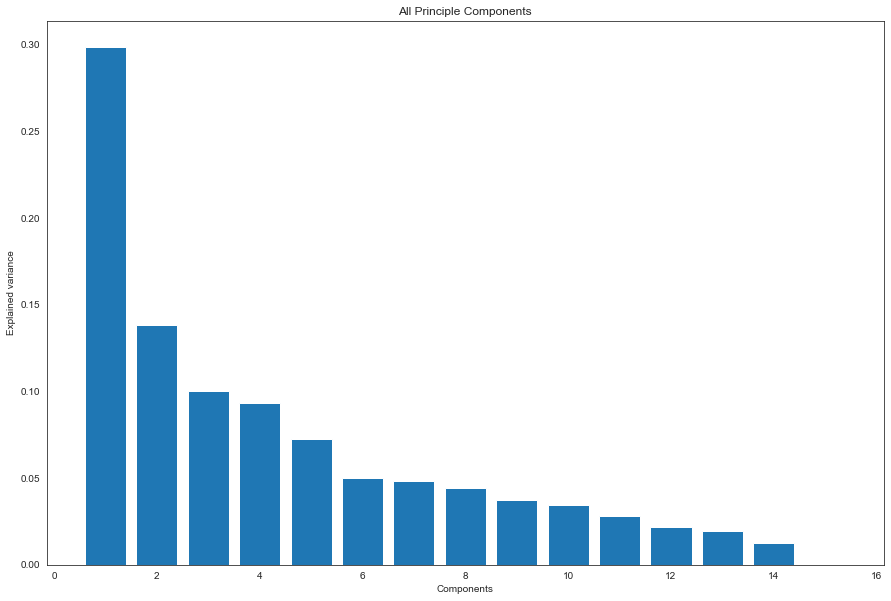

In [254]:
# Run PCA and fit the model
myPCA = PCA()
x     = myPCA.fit(chile_data_s)

# Plotting the varaince explained by each component
plt.bar(range(1,len(x.explained_variance_ )+1),x.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.title('All Principle Components')
pass

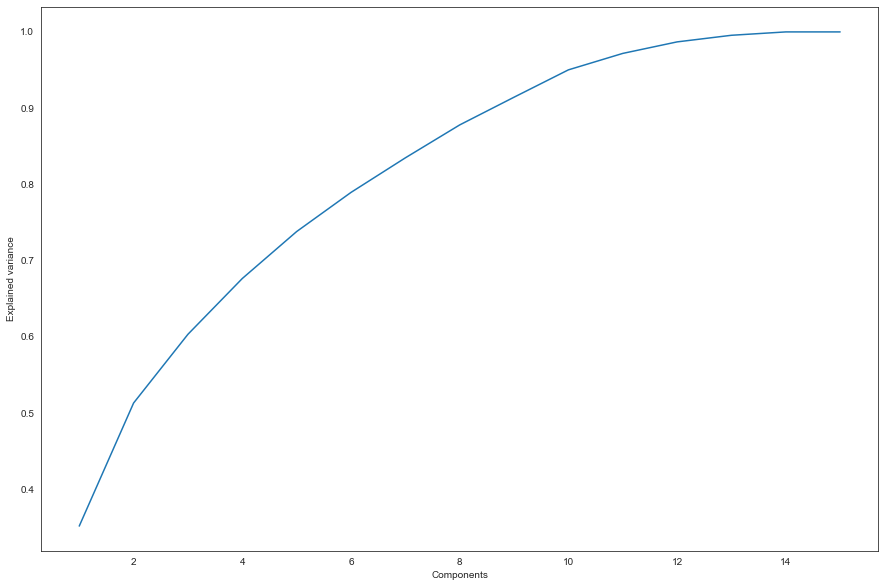

In [109]:
# Deciding on the number of principal componenets to chose
plt.plot(range(1, len(x.explained_variance_)+1), x.explained_variance_ratio_.cumsum())
plt.ylabel('Explained variance')
plt.xlabel('Components')
pass

In [255]:
x.explained_variance_ratio_.cumsum()

array([0.29863871, 0.43671553, 0.53716408, 0.63052424, 0.70282033,
       0.75283698, 0.80094128, 0.84500731, 0.88244427, 0.91711379,
       0.94533664, 0.96740941, 0.9871628 , 1.        , 1.        ])

We can take upto 9 components, they explain about 87% of the variation

Now we need to understand how much different features contribute to our principal components.

In [256]:
# Explore the importance of each feature for principle components
pca = PCA(n_components = 9).fit(chile_data_s)

In [257]:
vars_ = pca.explained_variance_ratio_
c_names = chile_data_s.columns
sum_ = 0

##### Checking the PCA

###### PCA 1

In [115]:
pd.DataFrame(np.column_stack((chile_data_s.columns, pca.components_[0]*100))).sort_values(by = 1, ascending = False)[0:10]

,0,1
48,Governmental funds devoted to tourism developm...,21.6185
45,Public infrastructure investments related to t...,21.385
26,Number of crimes investigated and resolved,21.2505
15,Density of service stations,21.1112
29,Number of police units,20.813
25,Number of reported crimes,20.7734
27,Number of accidents (roads; air; water),20.7385
7,Golf courses,20.6808
37,Temporary residents,20.2359
33,Yearly strikes,20.2272


In [258]:
# Calculate loadings
myPCA = PCA(n_components = 9)
pca_model = myPCA.fit(chile_data_s)

# Print
# print("The loadings are are \n {}".format(pca_model.components_))

In [259]:
# Calculate factor scores
pca_model = myPCA.fit_transform(chile_data_s)
PCcomponents = pd.DataFrame(data = pca_model, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
print("\n The Factor scores are")
PCcomponents


 The Factor scores are


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.951016,0.478877,-0.619545,0.375457,-1.264969,1.744384,-0.302510,-0.129548,-1.035849
1,-0.595433,0.412829,-1.421433,0.226571,0.607136,1.046928,-0.009986,-0.099478,1.418224
2,-0.245496,1.105351,-1.070505,0.362812,0.718386,-0.760174,1.046095,-1.061282,-0.328018
3,-0.976177,0.163944,-1.486389,0.178741,0.361313,-0.214225,0.615647,0.301616,0.192617
4,-0.132702,-0.841332,-0.157840,0.912923,1.009381,-0.039274,-0.108223,1.979193,-0.386033
5,1.448207,-0.008683,1.714226,2.689434,-0.099021,0.014147,0.316597,-0.430638,0.151139
6,5.614597,1.331212,-0.369067,-0.839511,-0.582008,-0.007481,-0.232546,0.345712,0.186815
7,-0.224697,-1.405135,-0.238284,0.818804,-0.996606,-0.700950,-0.838854,-0.399518,0.465573
8,-0.233292,-1.719791,-0.371896,-0.220699,-0.532993,-0.387547,-0.077035,-0.158214,-0.077791
9,0.905594,-0.998428,-0.503409,-0.687203,0.846466,-0.704470,-0.432469,-0.294791,-0.839382


###### 4. Developing a scoring system for 10 dimensions

Developing a scoring methodology is the most tricky part of the assignment and should be taken carefully.

Different consultants can offer different scoring methodologies and argue that their approach is correct.

However, this is an example of a scoring system, which can be developed as a part of this assignment.

Methodology steps:

Step 1 - Calculate a weighted average for each variable in principal components.

Multiply the percentage value of the explained variance by the percentage value of a feature in the selected principal component. As a result, a weighted average will be a new column in the dataframe with principal components.

In [260]:
# Calculate loadings
myPCA = PCA(n_components = 9)
pca_model = myPCA.fit(chile_data_s)

In [261]:
# Creating a dataframe of weights
weights = pd.DataFrame(np.column_stack((chile_data_s.columns, 
                                        pca_model.components_[0] * pca_model.explained_variance_ratio_[0],
                                        pca_model.components_[1] * pca_model.explained_variance_ratio_[1],
                                        pca_model.components_[2] * pca_model.explained_variance_ratio_[2],
                                        pca_model.components_[3] * pca_model.explained_variance_ratio_[3],
                                        pca_model.components_[4] * pca_model.explained_variance_ratio_[4],
                                        pca_model.components_[5] * pca_model.explained_variance_ratio_[5],
                                        pca_model.components_[6] * pca_model.explained_variance_ratio_[6],
                                        pca_model.components_[7] * pca_model.explained_variance_ratio_[7],
                                        pca_model.components_[7] * pca_model.explained_variance_ratio_[8])))
weights = weights.set_index(0)

# Create a weighted average
weights['weighted_average'] = weights.sum(axis = 1)/np.sum(pca_model.explained_variance_ratio_)

# Print
weights.head()

,1,2,3,4,5,6,7,8,9,weighted_average
0,,,,,,,,,,
CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,-0.00224916,-0.0268217,-0.00261452,0.0119958,-0.0151985,0.00432289,-0.00112895,0.00444534,0.0037766,-0.026599
NUMBER OF CULTURAL CENTERS,0.0435131,-0.00119319,0.00565117,0.00041486,0.00205034,-0.00225394,-0.00118657,-0.002327,-0.00197694,0.048379
WORLD CULTURAL HERITAGE SITES,0.00696551,-0.00315523,0.0117706,0.0187281,0.00434707,0.00398865,-0.00197638,-0.00626847,-0.00532547,0.032948
NUMBER OF ARCHEOLOGICAL SITES,-0.00481263,0.00902399,-0.00789847,0.0207663,-0.00475723,0.0077481,0.00583393,-0.00910108,-0.00773196,0.010279
NATIONAL MONUMENTS,0.0388969,0.00589664,0.00103969,-0.000377755,-0.00274757,-9.65333e-05,0.00133075,0.00050759,0.000431231,0.050860


###### Step 2. Calculate a score for each dimension.

Component Loadings are the most important part of the output because they tell you how to interpret the Component Scores; they tell you the relative role of each variable in computing a Component score. A loading is a correlation between the original data and the Component scores.  The absolute value of the loading tells you how important the variable is in computing the score. If a variable is highly related to the score (i.e. is very important in determining the value), the absolute value of the correlation will be high.  As a rule of thumb, loadings with absolute values less than 0.300 are not considered in the interpretation. The sign of the coefficient tells you in which way the variables are related to the scores.  If the sign is negative, it means that the higher the value of the variable, the lower the score.

Positive loadings indicate a variable and a principal component are positively correlated: an increase in one results in an increase in the other. Negative loadings indicate a negative correlation.


###### #Ranking for dimension 1: CULTURAL HERITAGE AND EVENTS

In [263]:
# Create a dataframe for relevant variables
dim1 = chile_data_s.iloc[:, 0:24].mul(weights['weighted_average'][0:24], axis = 1)

# Create a score ranking
dim1['Ranking 1'] = dim1.sum(axis = 1)
dim1['Ranking1_abs'] = dim1['Ranking 1'].abs()

# Sort by score
dim1_sort = dim1.sort_values(by = 'Ranking1_abs', ascending = False)
dim1_sort["Rank1"] = dim1_sort["Ranking1_abs"].rank(ascending = False)
dim1_sort.head()

,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,GALERIES,% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP,NUMBER OF EXHIBITS,"ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR",MAJOR SPORTS EVENTS PER YEAR,"OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS",ARTWORK SITES,POPULAR ARCHITECTURE SITES,HISTORICAL SITES,LOCAL MARKETS,CULTURAL SITES LEVEL III (INTERNATIONAL),CULTURA SITES LEVEL II (NATIONAL),CULTURAL SITES LEVEL I (LOCAL),HERITAGE ARCHITECTURAL HOUSES,Ranking 1,Ranking1_abs,Rank1
Regions,,,,,,,,,,,,,,,,,,,,,,,,,,,
Metropolitana,-0.003325,0.048379,0.000000,0.000343,0.050860,0.037415,0.029239,0.035289,0.038864,0.043773,0.047272,-0.001073,0.038295,-0.000000,-0.000000,0.022615,-0.005720,0.000000,0.002484,0.006385,0.003639,0.071031,0.042713,0.017290,0.525767,0.525767,1.0
Valparaíso,-0.011637,0.031357,0.032948,0.008224,0.018925,0.012828,0.037447,0.003529,0.001886,0.016748,0.013236,-0.000687,0.003830,-0.020173,-0.003816,0.030153,-0.005720,0.022583,0.006742,0.006385,0.041851,0.075766,0.011797,0.045432,0.379631,0.379631,2.0
Los Lagos,-0.000831,0.019710,0.016474,0.000000,0.006177,0.011759,0.022314,0.004033,0.001589,0.007232,0.001891,-0.008244,0.002553,-0.000000,-0.000000,0.000000,-0.000000,0.017331,0.000355,0.004789,0.000000,0.044512,0.009356,0.005931,0.166932,0.166932,3.0
Antofagasta,-0.000831,0.006271,0.000000,0.009594,0.008411,0.017104,0.041807,0.004033,0.001180,0.001142,0.003782,-0.001760,0.002553,-0.006724,-0.000000,0.022615,-0.002860,0.009979,0.012420,0.000000,0.003639,0.019889,0.007729,0.003975,0.163946,0.163946,4.0
Biobío,-0.004156,0.026877,0.000000,0.000000,0.005520,0.021380,0.020006,0.006050,0.002870,0.019412,0.013236,-0.000988,0.012765,-0.000000,-0.000000,0.000000,-0.011441,0.004202,0.007452,0.003192,0.000000,0.000000,0.019119,0.008519,0.154015,0.154015,5.0


Text(0.5, 1.0, 'CULTURAL HERITAGE AND EVENTS')

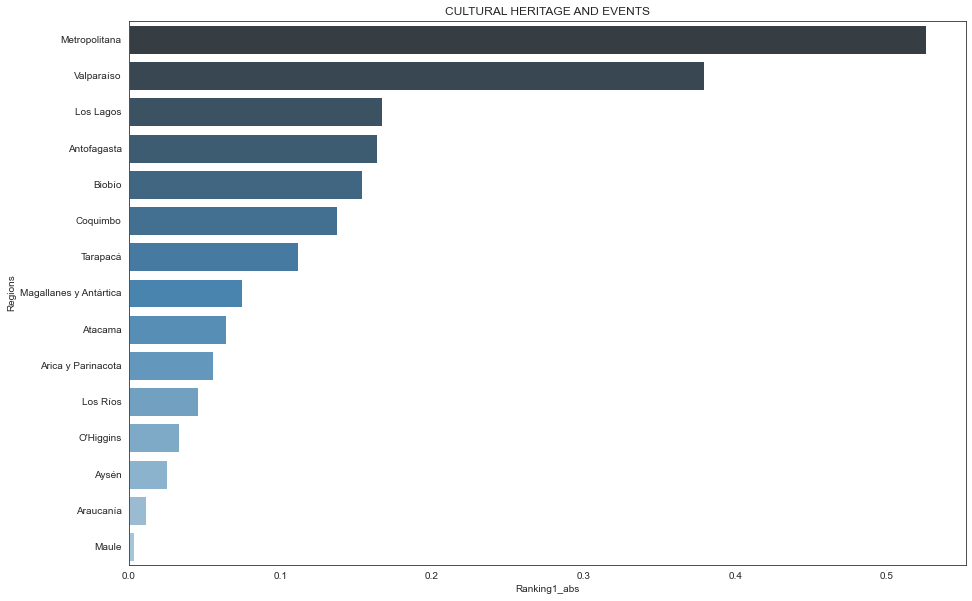

In [266]:
seaborn.barplot(x='Ranking1_abs',y ='Regions', data=dim1_sort.reset_index(), palette="Blues_d").set_title("CULTURAL HERITAGE AND EVENTS")

##### Ranking for dimension 2: NATURAL RESOURCES AND SUSTAINABILITY

In [275]:
# Ranking for dimension 2: NATURAL RESOURCES AND SUSTAINABILITY

# Create a dataframe for relevant variables
dim2 = chile_data_s.iloc[:, 24:47].mul(weights['weighted_average'][24:47], axis = 1)

# Create a score ranking
dim2['Ranking 2'] = dim2.sum(axis = 1)
dim2['Ranking2_abs'] = dim2['Ranking 2'].abs()

# Sort by score
dim2_sort = dim2.sort_values(by = 'Ranking2_abs', ascending = False)
dim2_sort["Rank2"] = dim2_sort["Ranking2_abs"].rank(ascending = False)
dim2_sort.head()

,% OF LAND THAT CORRESPONDS TO FORESTS,NATIONAL PROTECTED SITES (%),% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,TOXIC WASTE DISPOSAL (TONS/100 hab.),NUMBER OF ENVIRONMENTAL COMPLAINTS PRESENTED,ENVIRONMENTAL ISSUES PER MILLION HABITANTS,NUMBER OF BEACHES AND BEACH RESORTS,LAND AFFECTED BY WILDFIRES,NATURAL PROTECTED SITES LEVEL III (INTERNATIONAL),NATURAL PROTECTED SITES LEVEL II (NATIONAL),"RIVERS, LAKES AND WATERFALLS","MOUNTAINS, VOLCANOES AND MOUNTAIN SYSTEMS",GEISERS AND THERMAL CENTERS,PIERS AND SEASHORES,GLACIERS AND WINTER VACATION LOCATIONS,VALLEYS,DESERTS AND DUNES,ISLANDS AND PENINSULAS,PALEONTOLOGY SITES,HIKING TRAILS,PRESERVED SITES,SEASHORE PROTECTED SITES,BIOSHPERE RESERVES,Ranking 2,Ranking2_abs,Rank2
Regions,,,,,,,,,,,,,,,,,,,,,,,,,,
Valparaíso,-0.002795,-0.000114,0.013343,0.002179,0.047094,-0.0,0.033190,0.029400,0.009865,0.004011,-0.001295,-0.000000,-0.004337,0.030185,-0.001469,0.060403,-0.001542,0.000000,-0.000000,-0.002690,0.014906,0.080768,0.03616,0.347261,0.347261,1.0
Coquimbo,-0.000332,-0.000000,0.002145,0.000000,0.003623,-0.0,0.020814,0.006646,0.003035,0.000767,-0.003022,-0.000000,-0.001446,0.045277,-0.000000,0.048898,-0.000000,0.004669,-0.003801,-0.000000,0.014906,0.053845,0.01808,0.214104,0.214104,2.0
Metropolitana,-0.002952,-0.000025,0.046136,0.003614,0.057961,-0.0,0.000000,0.000165,0.002277,0.000000,-0.000000,-0.008695,-0.005783,0.000000,-0.002448,0.023011,-0.000000,0.000000,-0.000000,-0.000000,0.014906,0.000000,0.00000,0.128168,0.128168,3.0
Los Lagos,-0.024262,-0.000769,0.001036,0.001561,0.003623,-0.0,0.010126,0.000013,0.009106,0.002242,-0.007340,-0.028982,-0.013012,0.021560,-0.001469,0.014382,-0.000000,0.016082,-0.000000,-0.000000,0.024844,0.080768,0.01808,0.127589,0.127589,4.0
Magallanes y Antártica,-0.008699,-0.002821,0.000105,0.002533,0.010868,-0.0,0.000000,0.000033,0.014418,0.003480,-0.009931,-0.028982,-0.000000,0.036653,-0.009791,0.025887,-0.000000,0.000000,-0.003801,-0.000192,0.014906,0.026923,0.01808,0.089669,0.089669,5.0


Text(0.5, 1.0, 'NATURAL RESOURCES AND SUSTAINABILITY')

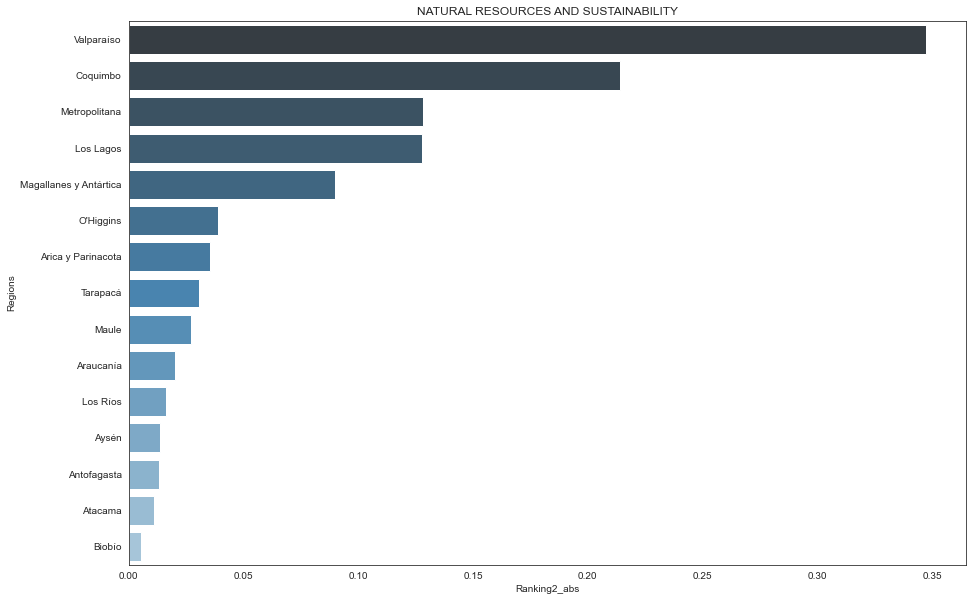

In [276]:
seaborn.barplot(x='Ranking2_abs',y ='Regions', data=dim2_sort.reset_index(), palette="Blues_d").set_title("NATURAL RESOURCES AND SUSTAINABILITY")


##### Ranking for dimension 3: HUMAN RESOURCES AND TOURISM-RELATED WORKFORCE DEVELOPMENT

In [277]:
# Ranking for dimension 3: HUMAN RESOURCES AND TOURISM-RELATED WORKFORCE DEVELOPMENT

# Create a dataframe for relevant variables
dim3 = chile_data_s.iloc[:, 47:59].mul(weights['weighted_average'][47:59], axis = 1)

# Create a score ranking
dim3['Ranking 3'] = dim3.sum(axis = 1)
dim3['Ranking3_abs'] = dim3['Ranking 3'].abs()

# Sort by score
dim3_sort = dim3.sort_values(by = 'Ranking3_abs', ascending = False)
dim3_sort["Rank3"] = dim3_sort["Ranking3_abs"].rank(ascending = False)
dim3_sort.head()

,% AVAILABLE WORKFORCE,% POPULATION ORIENTED TOWARDS TOURISM,AVERAGE MONTHLY INCOME (CHILEAN PESOS),5 POPULATION WITH PRIMARY EDUCATION,% POPULATION WITH SECONDARY EDUCATION,AVERAGE NUMBER OF YEARS STUDYING,HIGHER EDUCATION AND TECHNICAL INSTITUTIONS,TOURISM-ORIENTED INSTITUTIONS,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,Ranking 3,Ranking3_abs,Rank3
Regions,,,,,,,,,,,,,,,
Metropolitana,0.010793,0.013430,0.013854,-0.012349,0.005482,0.054384,-0.000000,0.058854,0.049936,0.048761,0.000052,0.041167,0.284364,0.284364,1.0
Valparaíso,0.008879,0.002084,0.005239,-0.011732,0.008367,0.040399,-0.000801,0.040589,0.015136,0.012044,0.000170,0.009730,0.130105,0.130105,2.0
Biobío,0.004929,0.002628,0.003606,-0.011114,0.006059,0.021936,-0.000398,0.032471,0.015424,0.012200,0.000000,0.006122,0.093863,0.093863,3.0
Tarapacá,0.021034,0.003127,0.010726,-0.008027,0.001827,0.042010,-0.002208,0.008118,0.000744,0.000505,0.000330,0.000808,0.078995,0.078995,4.0
Antofagasta,0.009649,0.002289,0.018105,-0.008027,0.001827,0.040386,-0.002076,0.012177,0.001812,0.001593,0.000302,0.000275,0.078311,0.078311,5.0


Text(0.5, 1.0, 'HUMAN RESOURCES AND TOURISM-RELATED WORKFORCE DEVELOPMENT')

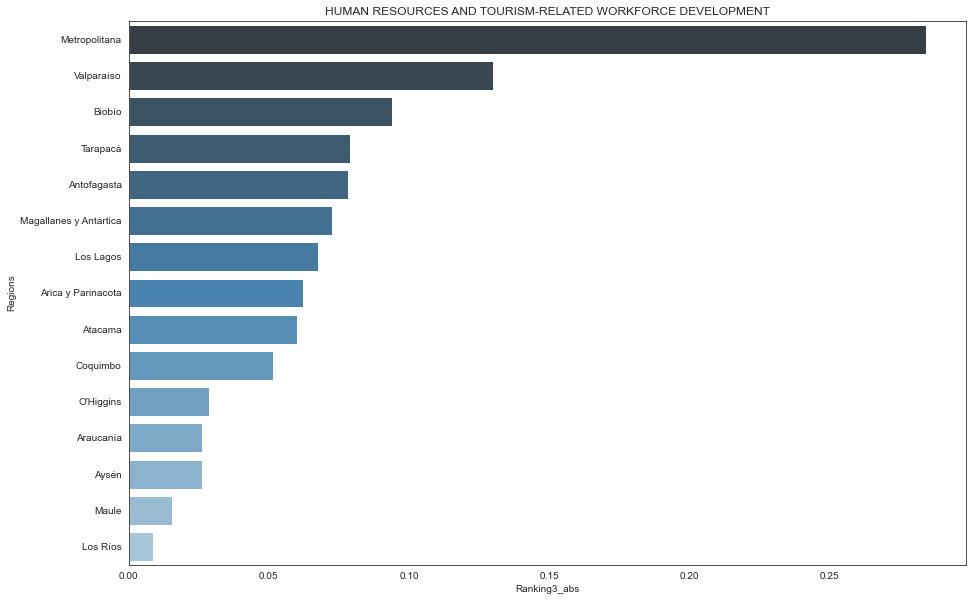

In [279]:
seaborn.barplot(x='Ranking3_abs',y ='Regions', data=dim3_sort.reset_index(), palette="Blues_d").set_title("HUMAN RESOURCES AND TOURISM-RELATED WORKFORCE DEVELOPMENT")

##### #Ranking for dimension 4: TOURISM INFRASTRUCTURE

In [280]:
#Ranking for dimension 4: TOURISM INFRASTRUCTURE

# Create a dataframe for relevant variables
dim4 = chile_data_s.iloc[:, 56:69].mul(weights['weighted_average'][56:69], axis = 1)

# Create a score ranking
dim4['Ranking 4'] = dim4.sum(axis = 1)
dim4['Ranking4_abs'] = dim4['Ranking 4'].abs()

# Sort by score
dim4_sort = dim4.sort_values(by = 'Ranking4_abs', ascending = False)
dim4_sort["Rank4"] = dim4_sort["Ranking4_abs"].rank(ascending = False)
dim4_sort.head()

,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,% OF TOURISM-RELATED ROOMS AVAILABLE THROUGHOUT THE YEAR,ROOMS PER 1000 HABITANTS,"NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.","TOURISM-RELATED WORKFORCE (PER 10,000 EMPLOYEES)",AVERAGE % OF OCCUPANCY THROUGHOUT THE YEAR,AVERAGE NUMBER OF NIGHTS THAT TOURISTS SPEND,NUMBER OF ESTABLISHMENTS WITH A TOURIST-RELATED CERTIFICATION,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RELATED CERTIFICATIONS,TOURISM-RELATED INVESTEMENTS (MILLION USD) BY CHAMBER OF COMMERCE MEMBERS,TOURISM-RELATED INFRASTRUCTURE INVESTMENT (MILLION USD/YEAR),Ranking 4,Ranking4_abs,Rank4
Regions,,,,,,,,,,,,,,,,
Metropolitana,0.048761,0.000052,0.041167,0.028677,0.000000,0.082937,0.000629,0.037213,0.015555,0.026257,0.047339,0.070916,0.018864,0.418366,0.418366,1.0
Valparaíso,0.012044,0.000170,0.009730,0.009512,0.000234,0.084882,0.003131,0.011985,0.009333,0.024506,0.009324,0.086505,0.020542,0.281900,0.281900,2.0
Coquimbo,0.003069,0.000086,0.002695,0.007951,0.000291,0.039807,0.001194,0.016595,0.034222,0.007002,0.002869,0.036097,0.059949,0.211827,0.211827,3.0
Los Lagos,0.002564,0.000310,0.007041,0.006650,0.000506,0.064856,0.003686,0.013578,0.003111,0.047262,0.004304,0.005087,0.003837,0.162791,0.162791,4.0
Araucanía,0.002370,0.000120,0.001702,0.004016,0.000144,0.043818,0.002056,0.018439,0.024888,0.026257,0.002152,0.002257,0.001998,0.130217,0.130217,5.0


Text(0.5, 1.0, 'TOURISM INFRASTRUCTURE')

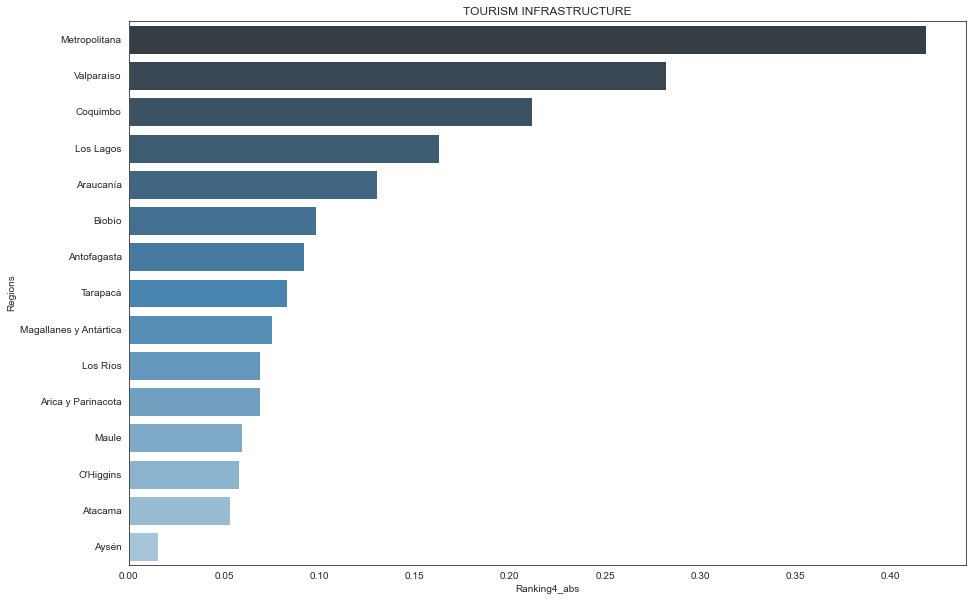

In [281]:
seaborn.barplot(x='Ranking4_abs',y ='Regions', data=dim4_sort.reset_index(), palette="Blues_d").set_title("TOURISM INFRASTRUCTURE")

##### # Ranking for dimension 5: TOURISM MOBILITY AND TRANSPORTATION INFRASTRUCTURE

In [282]:
# Ranking for dimension 5: TOURISM MOBILITY AND TRANSPORTATION INFRASTRUCTURE

# Create a dataframe for relevant variables
dim5 = chile_data_s.iloc[:, 69:81].mul(weights['weighted_average'][69:81], axis = 1)

# Create a score ranking
dim5['Ranking 5'] = dim5.sum(axis = 1)
dim5['Ranking5_abs'] = dim5['Ranking 5'].abs()

# Sort by score
dim5_sort = dim5.sort_values(by = 'Ranking5_abs', ascending = False)
dim5_sort["Rank5"] = dim5_sort["Ranking5_abs"].rank(ascending = False)
dim5_sort.head()

,NATIONAL TOURISTS ARRIVALS,INTERNATIONAL TOURISTS ARRIVALS,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,DENSITY OF AIRPORTS,DENSITY OF ROADS AND HIGHWAYS,% OF ROADS THAT ARE HIGHWAYS (FOUR LINES),NUMBER OF VEHICLES,VISITORS TO PROTECTED SITES,NUMBER OF CRUISES THAT ARRIVE PER YEAR,TOURIST'S ARRIVALS THROUGH BORDER LINES,SECONDARY ROADS (KMS),NUMBER OF INTERNATIONAL BORDER GATES,Ranking 5,Ranking5_abs,Rank5
Regions,,,,,,,,,,,,,,,
Metropolitana,0.063561,0.049718,0.046584,0.002550,-0.003941,0.044773,0.042759,0.005693,0.000000,0.061514,0.006654,-0.000694,0.319171,0.319171,1.0
Valparaíso,0.060771,0.006544,0.013500,0.001293,-0.000000,0.023089,0.009878,0.009989,0.052627,0.023392,0.002513,-0.000694,0.202903,0.202903,2.0
Los Lagos,0.037271,0.006422,0.011025,0.021756,-0.012522,0.010975,0.003673,0.033324,0.047534,0.010349,0.017678,-0.002081,0.185403,0.185403,3.0
Biobío,0.055182,0.001595,0.000000,0.000000,-0.006083,0.033078,0.009727,0.003389,0.000000,0.000044,0.017199,-0.000694,0.113439,0.113439,4.0
Arica y Parinacota,0.010415,0.001777,0.049169,0.010496,-0.014268,0.001137,0.000861,0.001005,0.022069,0.008967,0.000125,-0.002081,0.089673,0.089673,5.0


Text(0.5, 1.0, 'TOURISM MOBILITY AND TRANSPORTATION INFRASTRUCTURE')

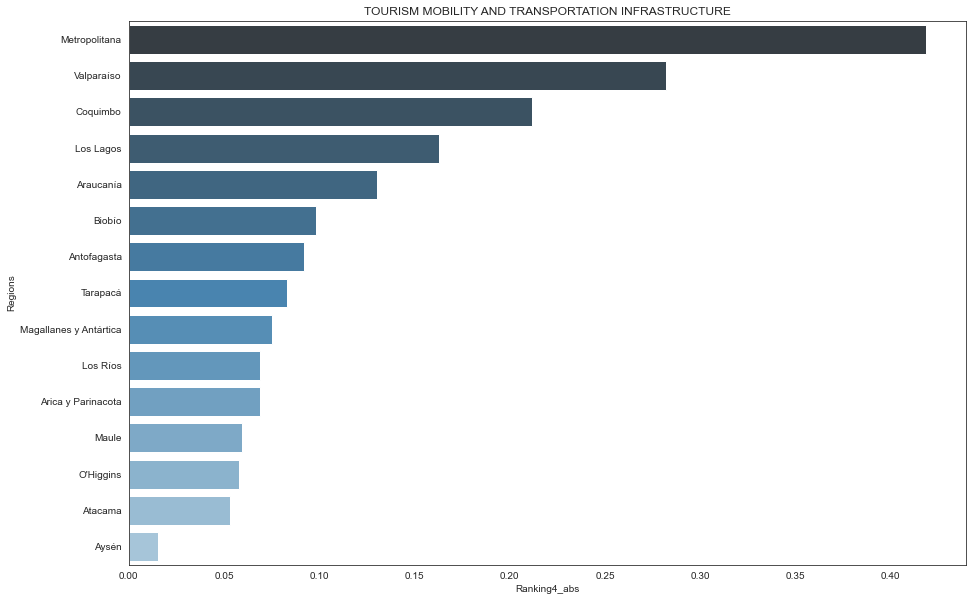

In [283]:
seaborn.barplot(x='Ranking4_abs',y ='Regions', data=dim4_sort.reset_index(), palette="Blues_d").set_title("TOURISM MOBILITY AND TRANSPORTATION INFRASTRUCTURE")

##### Ranking for Dimension 6: Tourism Related Services

In [303]:
# Create a dataframe for relevant variables
dim6 = chile_data_s.iloc[:, 81:99].mul(weights['weighted_average'][81:99], axis = 1)

# Create a score ranking
dim6['Ranking6'] = dim6.sum(axis = 1)
dim6['Ranking6_abs'] = dim6['Ranking6'].abs()

# Sort by score
dim6_sort = dim6.sort_values(by = 'Ranking6_abs', ascending = False)
dim6_sort["Rank6"] = dim6_sort["Ranking6_abs"].rank(ascending = False)
dim6_sort

,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants",Ski resorts,Major shopping centers,"Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Number of vineyards,Ranking6,Ranking6_abs,Rank6
Regions,,,,,,,,,,,,,,,,,,,,,
Metropolitana,0.000000,0.000188,0.040772,-0.002913,0.046247,0.000000,-0.000000,0.058105,-0.003548,0.000052,-0.005329,0.001920,0.046296,0.047715,0.052484,0.039289,0.045726,-0.000927,0.366075,0.366075,1.0
Valparaíso,0.006917,0.002139,0.012685,-0.003763,0.031171,0.000873,-0.000980,0.033203,-0.003763,0.000170,-0.003997,0.002441,0.018518,0.011567,0.028603,0.012989,0.003517,-0.004637,0.147653,0.147653,2.0
Magallanes y Antártica,0.007975,0.002934,0.009060,-0.006379,0.055789,0.000000,-0.006672,0.002767,-0.000645,0.002175,-0.000000,0.002397,0.009259,0.002892,0.044357,0.000321,0.003517,-0.000000,0.129745,0.129745,3.0
Antofagasta,0.004489,0.001388,0.018121,-0.004596,0.052082,0.000291,-0.002037,0.008301,-0.002903,0.000302,-0.002665,0.001865,0.000000,0.004338,0.035363,0.001764,0.002345,-0.000000,0.118446,0.118446,4.0
Los Lagos,0.004356,0.000864,0.019933,-0.001830,0.017809,0.000194,-0.002106,0.005534,-0.001935,0.000310,-0.010659,0.003357,0.018518,0.002892,0.012501,0.005532,0.007035,-0.000000,0.082305,0.082305,5.0
Araucanía,0.001083,0.000109,0.020839,-0.003056,0.007698,0.002231,-0.001157,0.005534,-0.000753,0.000120,-0.017321,0.002967,0.037036,0.001446,0.006186,0.008098,0.005862,-0.000000,0.076923,0.076923,6.0
Tarapacá,0.002679,0.000816,0.000000,-0.000436,0.038068,0.000000,-0.002106,0.008301,-0.000000,0.000330,-0.006662,0.005237,0.000000,0.002892,0.024444,0.000882,0.000000,-0.000000,0.074445,0.074445,7.0
Atacama,0.005702,0.000837,0.015403,-0.002901,0.031757,0.000097,-0.001978,0.002767,-0.000000,0.000270,-0.003997,0.004233,0.000000,0.000000,0.017570,0.001443,0.001172,-0.000000,0.072376,0.072376,8.0
Biobío,0.000786,0.000000,0.012685,-0.003537,0.003585,0.000194,-0.000811,0.016601,-0.001828,0.000000,-0.003997,0.002679,0.009259,0.004338,0.012563,0.015555,0.001172,-0.000000,0.069244,0.069244,9.0


Text(0.5, 1.0, 'Tourism Related Services')

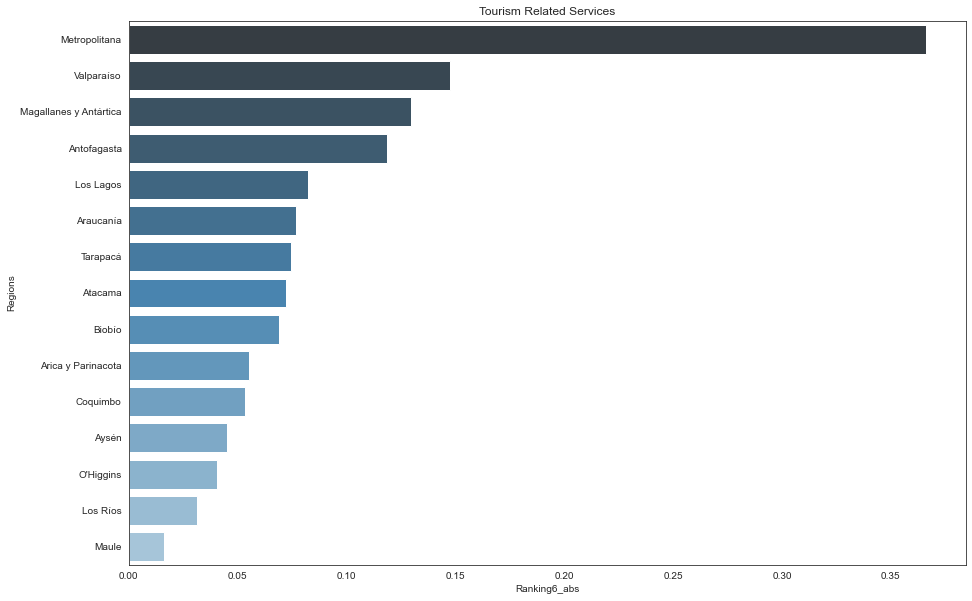

In [288]:
seaborn.barplot(x='Ranking6_abs',y ='Regions', data=dim6_sort.reset_index(), palette="Blues_d").set_title("Tourism Related Services")

#### Ranking for dimension 7: Security and Saftey

In [304]:
# Create a dataframe for relevant variables
dim7 = chile_data_s.iloc[:, 99:111].mul(weights['weighted_average'][99:111], axis = 1)

# Create a score ranking
dim7['Ranking7'] = dim7.sum(axis = 1)
dim7['Ranking7_abs'] = dim7['Ranking7'].abs()

# Sort by score
dim7_sort = dim7.sort_values(by = 'Ranking7_abs', ascending = False)
dim7_sort["Rank7"] = dim7_sort["Ranking7_abs"].rank(ascending = False)
dim7_sort

,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Ranking7,Ranking7_abs,Rank7
Regions,,,,,,,,,,,,,,,
Metropolitana,0.006913,0.001246,0.005573,-0.000336,0.017494,0.033370,-0.007157,0.041663,0.047762,0.042775,0.039292,0.041722,0.270316,0.270316,1.0
Biobío,0.006422,0.001409,0.005365,-0.000000,0.012408,0.020169,-0.003303,0.010385,0.016052,0.009918,0.000191,0.013546,0.092562,0.092562,2.0
Valparaíso,0.004418,0.001203,0.008865,-0.000992,0.013629,0.008428,-0.012937,0.008331,0.016009,0.011890,0.000858,0.011581,0.071281,0.071281,3.0
Tarapacá,0.008917,0.003121,0.008897,-0.000000,0.022172,0.001964,-0.000000,0.002499,0.000000,0.001280,0.003064,0.001711,0.053625,0.053625,4.0
Los Lagos,0.004909,0.000228,0.011367,-0.000000,0.007730,0.005514,-0.007707,0.002830,0.006349,0.003001,0.000992,0.005429,0.040640,0.040640,5.0
Araucanía,0.007281,0.001170,0.007470,-0.000585,0.007221,0.011773,-0.019543,0.004811,0.006309,0.005134,0.001669,0.006070,0.038779,0.038779,6.0
Coquimbo,0.003477,0.000412,0.018913,-0.000000,0.009967,0.005737,-0.014038,0.002245,0.002165,0.002641,0.000517,0.003941,0.035976,0.035976,7.0
Antofagasta,0.014030,0.001452,0.012056,-0.000000,0.008442,0.007221,-0.026700,0.004187,0.002188,0.003565,0.000036,0.002498,0.028976,0.028976,8.0
Aysén,0.006054,0.000824,0.021720,-0.005563,0.007018,0.002812,-0.012937,0.000200,0.001375,0.000000,0.000000,0.001151,0.022654,0.022654,9.0


Text(0.5, 1.0, 'Security and Saftey')

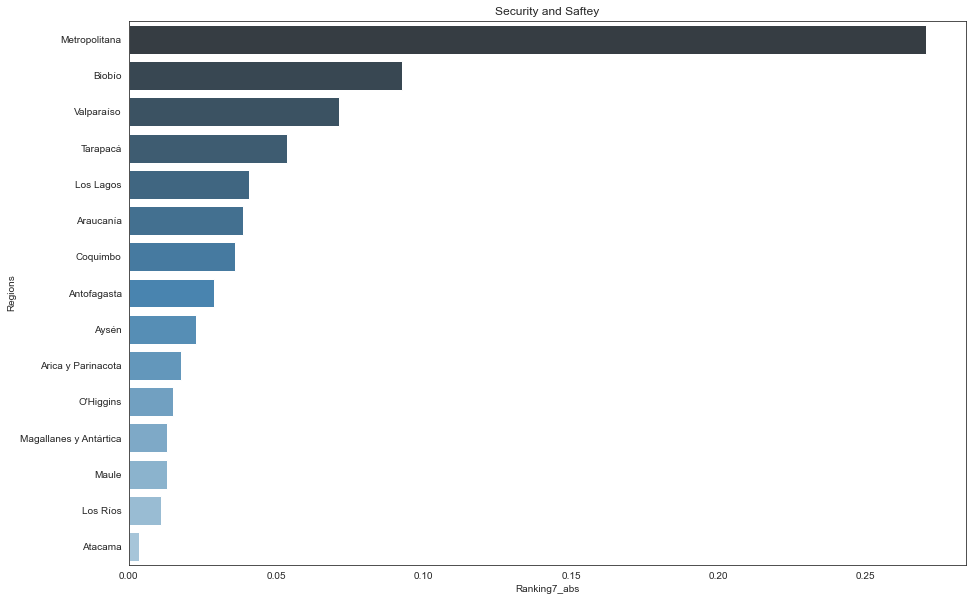

In [306]:
seaborn.barplot(x='Ranking7_abs',y ='Regions', data=dim7_sort.reset_index(), palette="Blues_d").set_title("Security and Saftey")


##### # Ranking for dimension 8: Economic Performance

In [307]:
# Create a dataframe for relevant variables
dim8 = chile_data_s.iloc[:, 111:120].mul(weights['weighted_average'][111:120], axis = 1)

# Create a score ranking
dim8['Ranking8'] = dim8.sum(axis = 1)
dim8['Ranking8_abs'] = dim8['Ranking8'].abs()

# Sort by score
dim8_sort = dim8.sort_values(by = 'Ranking8_abs', ascending = False)
dim8_sort["Rank8"] = dim8_sort["Ranking8_abs"].rank(ascending = False)
dim8_sort

,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual participating on a strike,Banks per one million habitants,Temporary residents,Exports (volume in million chilean pesos),Ranking8,Ranking8_abs,Rank8
Regions,,,,,,,,,,,,
Metropolitana,0.006961,-0.004732,0.000398,0.039880,0.005777,0.036097,0.052836,0.049375,0.004641,0.191233,0.191233,1.0
Antofagasta,0.004475,-0.002760,0.000016,0.004738,0.002834,0.007361,0.007087,0.001519,0.012574,0.037844,0.037844,2.0
Los Lagos,0.000000,-0.008675,0.000177,0.000395,0.001090,0.000468,0.040528,0.000734,0.001652,0.036370,0.036370,3.0
Atacama,0.004806,-0.006572,0.000066,0.000790,0.024309,0.004325,0.005749,0.000267,0.002565,0.036304,0.036304,4.0
Tarapacá,0.002154,-0.010778,0.006608,0.001974,0.008612,0.014614,0.005447,0.000471,0.002398,0.031501,0.031501,5.0
Araucanía,0.007458,-0.016956,0.000135,0.001185,0.025399,0.001376,0.009329,0.002585,0.000228,0.030739,0.030739,6.0
Valparaíso,0.006629,-0.008412,0.000552,0.003554,0.004033,0.004026,0.005669,0.010453,0.003194,0.029698,0.029698,7.0
Coquimbo,0.004143,-0.009332,0.000008,0.000790,0.023982,0.000289,0.004408,0.001772,0.001635,0.027695,0.027695,8.0
Magallanes y Antártica,0.003149,-0.001183,0.001047,0.000000,0.016351,0.000089,0.000000,0.002093,0.000247,0.021793,0.021793,9.0


Text(0.5, 1.0, 'Economic Performance')

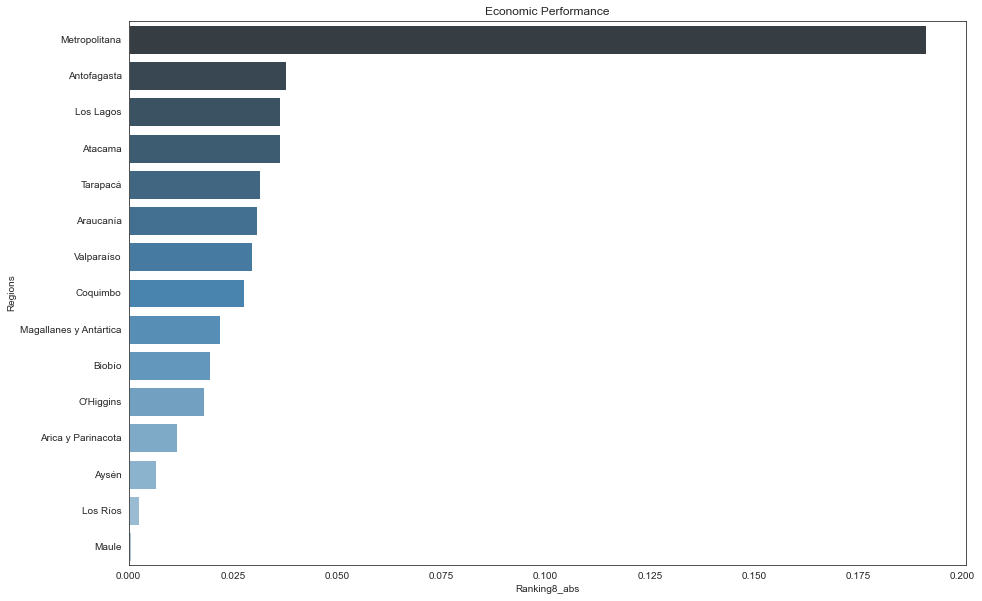

In [293]:
seaborn.barplot(x='Ranking8_abs',y ='Regions', data=dim8_sort.reset_index(), palette="Blues_d").set_title("Economic Performance")

##### # Ranking for dimension 9: Tourim Promotion

In [308]:
# Create a dataframe for relevant variables
dim9 = chile_data_s.iloc[:, 120:126].mul(weights['weighted_average'][120:126], axis = 1)

# Create a score ranking
dim9['Ranking9'] = dim9.sum(axis = 1)
dim9['Ranking9_abs'] = dim9['Ranking9'].abs()

# Sort by score
dim9_sort = dim9.sort_values(by = 'Ranking9_abs', ascending = False)
dim9_sort["Rank9"] = dim9_sort["Ranking9_abs"].rank(ascending = False)
dim9_sort


,Density of tourism offices per one million habitants,Number of tourism information offices,Average number of internet searches for main tourist attractions,Yearly budget for tourism promotion ($M),Yearly budget for international tourism promotion ($M),Governmental resources allocated to tourism promotion ($M),Ranking9,Ranking9_abs,Rank9
Regions,,,,,,,,,
Metropolitana,-0.000000,0.034628,0.061490,-0.000000,-0.000000,0.000000,0.096118,0.096118,1.0
Magallanes y Antártica,-0.007783,0.000000,0.001630,-0.019524,-0.000666,0.000329,-0.026015,0.026015,2.0
Coquimbo,-0.000799,0.015647,0.023503,-0.012416,-0.000093,0.000000,0.025843,0.025843,3.0
Antofagasta,-0.002239,0.027600,0.012042,-0.013359,-0.000189,0.001535,0.025390,0.025390,4.0
Valparaíso,-0.000583,0.003275,0.013008,-0.006772,-0.000081,0.011063,0.019910,0.019910,5.0
Araucanía,-0.000494,0.012060,0.007473,-0.004840,-0.000035,0.000000,0.014164,0.014164,6.0
Atacama,-0.002168,0.016924,0.001620,-0.003467,-0.000237,0.000000,0.012672,0.012672,7.0
Los Lagos,-0.002321,0.001123,0.031443,-0.019385,-0.000123,0.000651,0.011388,0.011388,8.0
Tarapacá,-0.002321,0.007740,0.007054,-0.001627,-0.000017,0.000000,0.010829,0.010829,9.0


Text(0.5, 1.0, 'Tourism Promotion')

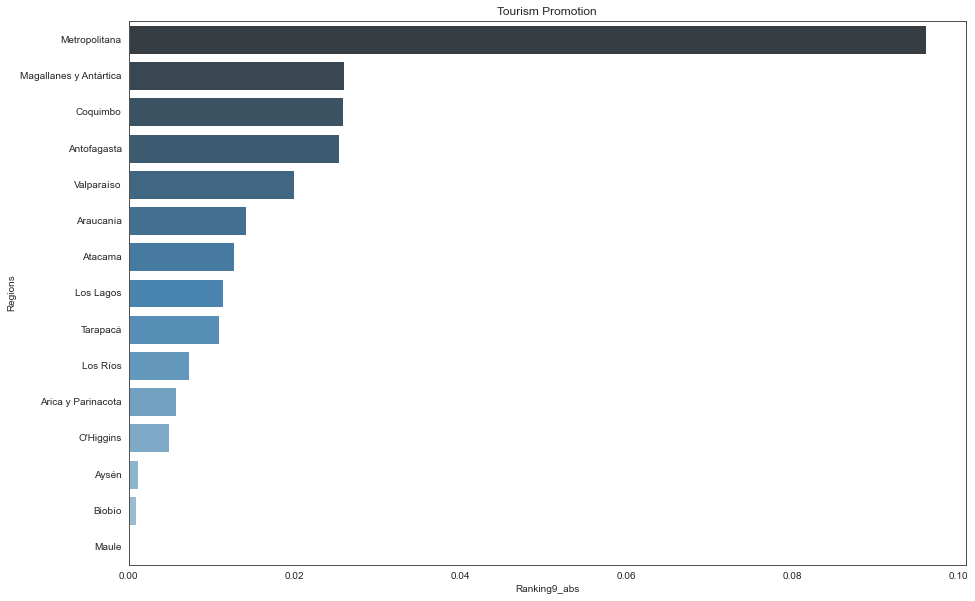

In [296]:
seaborn.barplot(x='Ranking9_abs',y ='Regions', data=dim9_sort.reset_index(), palette="Blues_d").set_title("Tourism Promotion")

##### Ranking for dimension 10: Government Involvement and Efficiency

In [309]:
# Create a dataframe for relevant variables
dim10 = chile_data_s.iloc[:, 126:131].mul(weights['weighted_average'][126:131], axis = 1)

# Create a score ranking
dim10['Ranking10'] = dim10.sum(axis = 1)
dim10['Ranking10_abs'] = dim10['Ranking10'].abs()

# Sort by score
dim10_sort = dim10.sort_values(by = 'Ranking10_abs', ascending = False)
dim10_sort["Rank10"] = dim10_sort["Ranking10_abs"].rank(ascending = False)
dim10_sort

,Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Seed funds allocated to the tourism sector ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development,Ranking10,Ranking10_abs,Rank10
Regions,,,,,,,,
Metropolitana,0.042904,0.060364,-0.000283,0.035705,-0.000000,0.138690,0.138690,1.0
Los Lagos,0.015092,0.055169,-0.003361,0.020432,-0.000323,0.087010,0.087010,2.0
Biobío,0.023008,0.031270,-0.007497,0.034245,-0.000645,0.080382,0.080382,3.0
Araucanía,0.007793,0.036629,-0.000000,0.016086,-0.000323,0.060185,0.060185,4.0
Coquimbo,0.007300,0.040753,-0.003069,0.010829,-0.000645,0.055167,0.055167,5.0
Valparaíso,0.015228,0.023697,-0.003697,0.014530,-0.000000,0.049758,0.049758,6.0
Antofagasta,0.001571,0.032862,-0.000877,0.014095,-0.000000,0.047650,0.047650,7.0
Maule,0.014353,0.014306,-0.002216,0.013007,-0.000323,0.039127,0.039127,8.0
Los Ríos,0.003959,0.019570,-0.002217,0.004146,-0.000000,0.025458,0.025458,9.0


Text(0.5, 1.0, 'Government Involvement and Efficiency')

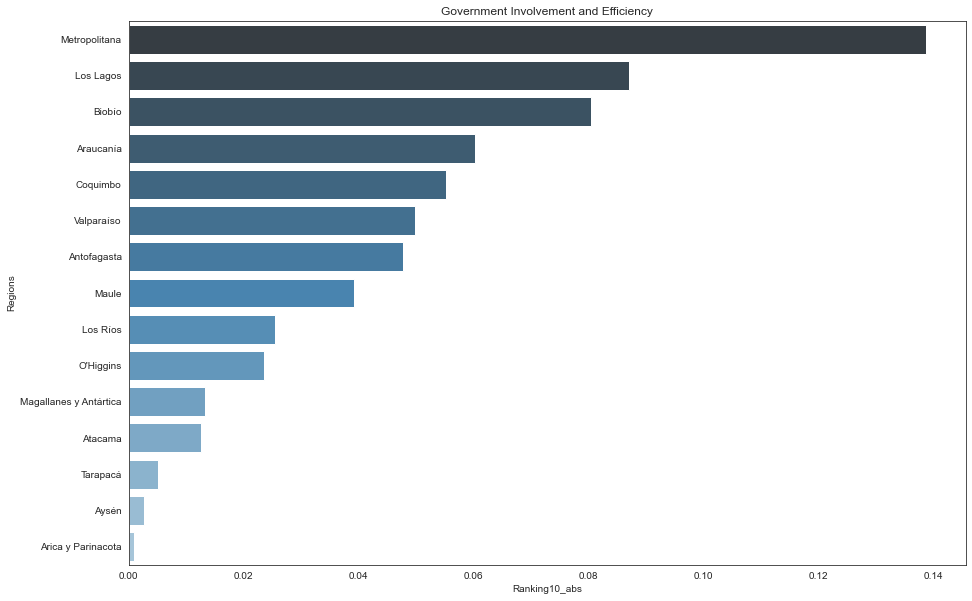

In [300]:
seaborn.barplot(x='Ranking10_abs',y ='Regions', data=dim10_sort.reset_index(), palette="Blues_d").set_title("Government Involvement and Efficiency")

In [302]:
a = dim1_sort[['Rank1']]
b = dim2_sort[['Rank2']]
c = dim3_sort[['Rank3']]
d = dim4_sort[['Rank4']]
e = dim5_sort[['Rank5']]
f = dim6_sort[['Rank6']]
g = dim7_sort[['Rank7']]
h = dim8_sort[['Rank8']]
i = dim9_sort[['Rank9']]
j = dim10_sort[['Rank10']]


overall_ranking = pd.concat([a,b,c,d,e,f,g,h,i,j], axis=1, join='inner').sort_index()

overall_ranking = overall_ranking.rename(columns={'Rank1': 'Cultural Heritage and Events Rank',
                                                  'Rank2': 'Natural Resources and Sustainability',
                                                  'Rank3': 'Human Resources and Tourism Related Workforce Development',
                                                  'Rank4': 'Tourism Infrastructure',
                                                  'Rank5': 'Tourism mobility and Transportation Infrastructure',
                                                  'Rank6': 'Tourism Related Services',
                                                  'Rank7': 'Security and Saftey',
                                                  'Rank8': 'Economic Performance',
                                                  'Rank9': 'Tourism Promotion',
                                                  'Rank10': 'Government Involvement and Efficiency'})

overall_ranking['Rank_Sum'] = overall_ranking.sum(axis=1)
overall_ranking.sort_values(by = 'Rank_Sum', ascending = True)

,Cultural Heritage and Events Rank,Natural Resources and Sustainability,Human Resources and Tourism Related Workforce Development,Tourism Infrastructure,Tourism mobility and Transportation Infrastructure,Tourism Related Services,Security and Saftey,Economic Performance,Tourism Promotion,Government Involvement and Efficiency,Rank_Sum
Regions,,,,,,,,,,,
Metropolitana,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0
Valparaíso,2.0,1.0,2.0,2.0,2.0,2.0,3.0,7.0,5.0,6.0,32.0
Los Lagos,3.0,4.0,7.0,4.0,3.0,5.0,5.0,3.0,8.0,2.0,44.0
Antofagasta,4.0,13.0,5.0,7.0,7.0,4.0,8.0,2.0,4.0,7.0,61.0
Coquimbo,6.0,2.0,10.0,3.0,9.0,11.0,7.0,8.0,3.0,5.0,64.0
Biobío,5.0,15.0,3.0,6.0,4.0,9.0,2.0,10.0,14.0,3.0,71.0
Magallanes y Antártica,8.0,5.0,6.0,9.0,8.0,3.0,12.0,9.0,2.0,11.0,73.0
Araucanía,14.0,10.0,12.0,5.0,6.0,6.0,6.0,6.0,6.0,4.0,75.0
Tarapacá,7.0,8.0,4.0,8.0,10.0,7.0,4.0,5.0,9.0,13.0,75.0
